# Project Group 17
## Regression Model

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import random

In [4]:
#Data Extraction
df=pd.read_csv('project.csv')
X1=pd.DataFrame(df,columns=['Depth of Cut'])
X2=pd.DataFrame(df,columns=['Cutting Speed'])
X3=pd.DataFrame(df,columns=['Feed Rate'])
X=pd.DataFrame(df,columns=['Depth of Cut','Cutting Speed','Feed Rate','Surface Roughness'])
#Creating Dataframe and Correlation Matrix
print (df.head())
print(X.corr())

            Unnamed: 0  Depth of Cut  Cutting Speed  Feed Rate  \
0  Balamugundan 2012 1           1.0           1000      100.0   
1  Balamugundan 2012 2           1.0           1500      150.0   
2  Balamugundan 2012 3           1.0           2000      200.0   
3  Balamugundan 2012 4           2.0           1000      150.0   
4  Balamugundan 2012 5           2.0           1500      200.0   

   Surface Roughness  
0               3.52  
1               3.27  
2               3.26  
3               3.67  
4               4.28  
                   Depth of Cut  Cutting Speed  Feed Rate  Surface Roughness
Depth of Cut           1.000000      -0.132235  -0.168806           0.216628
Cutting Speed         -0.132235       1.000000   0.484665           0.287828
Feed Rate             -0.168806       0.484665   1.000000           0.241340
Surface Roughness      0.216628       0.287828   0.241340           1.000000


In [5]:
#Renaming Column name of Dataframe
X = df.rename(columns = {"Depth of Cut": "X1", 
                                  "Cutting Speed":"X2", 
                                  "Feed Rate": "X3","Surface Roughness":"Y"}) 

In [6]:
X

,Unnamed: 0,X1,X2,X3,Y
0,Balamugundan 2012 1,1.00,1000,100.000,3.5200
1,Balamugundan 2012 2,1.00,1500,150.000,3.2700
2,Balamugundan 2012 3,1.00,2000,200.000,3.2600
3,Balamugundan 2012 4,2.00,1000,150.000,3.6700
4,Balamugundan 2012 5,2.00,1500,200.000,4.2800
5,Balamugundan 2012 6,2.00,2000,100.000,5.9400
6,Balamugundan 2012 7,3.00,1000,200.000,3.7900
7,Balamugundan 2012 8,3.00,1500,100.000,5.9800
8,Balamugundan 2012 9,3.00,2000,150.000,4.5300
9,Yang 2009 1,1.50,160,0.100,1.1267


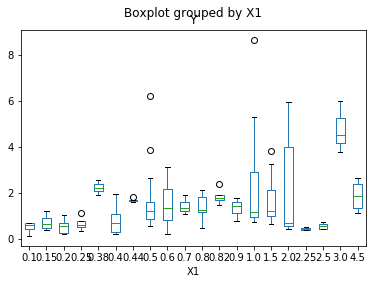

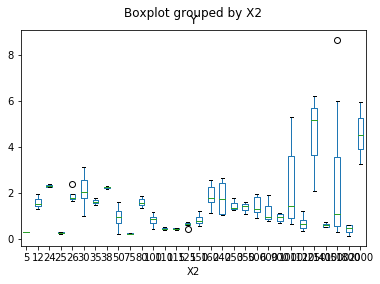

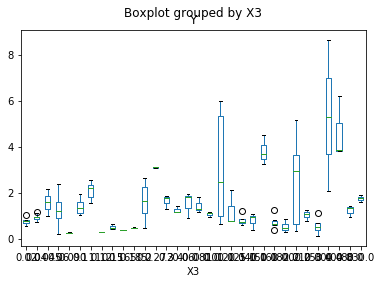

In [7]:
#Drawing Boxplot of Different X,Y combination 
import matplotlib.pyplot as plt  
X.boxplot(by ='X1', column =['Y'], grid = False) 
X.boxplot(by ='X2', column =['Y'], grid = False)
X.boxplot(by ='X3', column =['Y'], grid = False)


# Scatter Plots between X1, X2, X3 and Y

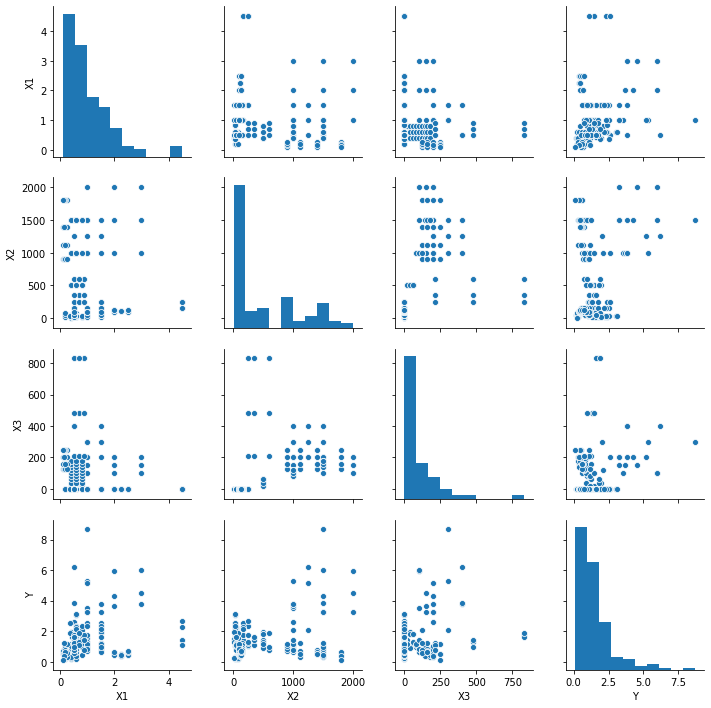

In [8]:
#Scatter Plot
import seaborn as sns
sns.pairplot(X)

In [9]:
#Scaling of Dataset
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_minmax=min_max.fit_transform(X[['X1', 'X2',
                'X3','Y']])


In [10]:
#Scaled Dataset
X_minmax

array([[2.04545455e-01, 4.98746867e-01, 1.20460734e-01, 3.98012858e-01],
       [2.04545455e-01, 7.49373434e-01, 1.80703149e-01, 3.68790181e-01],
       [2.04545455e-01, 1.00000000e+00, 2.40945565e-01, 3.67621274e-01],
       [4.31818182e-01, 4.98746867e-01, 1.80703149e-01, 4.15546464e-01],
       [4.31818182e-01, 7.49373434e-01, 2.40945565e-01, 4.86849795e-01],
       [4.31818182e-01, 1.00000000e+00, 1.20460734e-01, 6.80888369e-01],
       [6.59090909e-01, 4.98746867e-01, 2.40945565e-01, 4.29573349e-01],
       [6.59090909e-01, 7.49373434e-01, 1.20460734e-01, 6.85563998e-01],
       [6.59090909e-01, 1.00000000e+00, 1.80703149e-01, 5.16072472e-01],
       [3.18181818e-01, 7.76942356e-02, 9.63878648e-05, 1.18258328e-01],
       [3.18181818e-01, 1.17794486e-01, 9.63878648e-05, 1.04909410e-01],
       [3.18181818e-01, 7.76942356e-02, 2.16872696e-04, 2.83518410e-01],
       [3.18181818e-01, 1.17794486e-01, 2.16872696e-04, 2.62781999e-01],
       [1.00000000e+00, 7.76942356e-02, 9.63878648e

In [11]:
#Assigning new name to Dataset
df_1_ = pd.DataFrame(X_minmax)
df_1_.columns = ["X1", "X2", "X3","Y1"]

# Substituting NAN for 10% data point

In [12]:
p=df_1_.values
l=p.tolist()
for j in range(0,3):
    samp=random.sample(range(0,161),16)
    for i in range(16):
        l[samp[i]][j]=np.nan       
X_NEW=pd.DataFrame(l)
X_NEW.columns=['X1','X2','X3','Y1']
X_NEW

,X1,X2,X3,Y1
0,0.204545,0.498747,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.240946,0.367621
3,0.431818,0.498747,0.180703,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,1.000000,0.120461,0.680888
6,0.659091,NaN,0.240946,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [13]:
#Dataset after removing 10% datapoints
X_NEW

,X1,X2,X3,Y1
0,0.204545,0.498747,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.240946,0.367621
3,0.431818,0.498747,0.180703,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,1.000000,0.120461,0.680888
6,0.659091,NaN,0.240946,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


# Imputing Missing Datapoints with Mean

In [14]:
#Imputing missing datapoints with mean
from sklearn.impute import SimpleImputer
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
mean_imputer = mean_imputer.fit(X_NEW)
imputed_df = mean_imputer.transform(X_NEW)
dataset = pd.DataFrame({'X1': imputed_df[:, 0], 'X2': imputed_df[:, 1],'X3':imputed_df[:,2]})


C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
#Dataset after Imputing
dataset

,X1,X2,X3
0,0.204545,0.498747,0.120461
1,0.204545,0.749373,0.180703
2,0.204545,1.000000,0.240946
3,0.431818,0.498747,0.180703
4,0.431818,0.749373,0.240946
5,0.431818,1.000000,0.120461
6,0.659091,0.257617,0.240946
7,0.659091,0.749373,0.120461
8,0.659091,1.000000,0.180703
9,0.318182,0.077694,0.000096


In [16]:
#Joining Y column with imputed Dataset
dataset['Y']= X_NEW['Y1']

In [17]:
#Dataset after Joining Y
dataset

,X1,X2,X3,Y
0,0.204545,0.498747,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.240946,0.367621
3,0.431818,0.498747,0.180703,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,1.000000,0.120461,0.680888
6,0.659091,0.257617,0.240946,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [18]:
#Storing X and Y value separetely in different Dataset X and Y1
X_new=dataset
X=pd.DataFrame(X_new,columns=['X1','X2','X3'])
Y1=pd.DataFrame(X_new,columns=['Y'])

In [19]:
# Fitting Ordinary Least Square Method between X and Y1
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y1,X).fit()
model.summary()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     11.20
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.05e-06
Time:                        23:36:22   Log-Likelihood:                 91.050
No. Observations:                 162   AIC:                            -174.1
Df Residuals:                     158   BIC:                            -161.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0661      0.021      3.215      0.002       0.026       0.107
X1             0.2123      0.059      3.615      0.000       0.096       0.328
X2             0.1501      0.043      3.459      0.001       0.064       0.236
X3             0.1304      0.068      1.911      0.058      -0.004       0.265
==============================================================================
Omnibus:                       64.191   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.681
Skew:                           1.548   Prob(JB):                     1.08e-46
Kurtosis:                       7.667   Cond. No.                         7.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Creating New Features using combination of X1, X2, X3 and Y
X_new['X1^2'] = X_new.X1*X_new.X1
X_new['X1^3'] = X_new.X1*X_new.X1*X_new.X1
X_new['X1^4'] = X_new.X1*X_new.X1*X_new.X1*X_new.X1
X_new['expX1'] = np.exp(X_new.X1)
X_new['X2^2'] = X_new.X2*X_new.X2
X_new['X2^3'] = X_new.X2*X_new.X2*X_new.X2
X_new['X2^4'] = X_new.X2*X_new.X2*X_new.X2*X_new.X2
X_new['expX2'] = np.exp(X_new.X2)
X_new['X3^2'] = X_new.X3*X_new.X3
X_new['X3^3'] = X_new.X3*X_new.X3*X_new.X3
X_new['X3^4'] = X_new.X3*X_new.X3*X_new.X3*X_new.X3
X_new['expX3'] = np.exp(X_new.X3)
X_new['X1X2'] = X_new.X1*X_new.X2
X_new['X2X3'] = X_new.X2*X_new.X3
X_new['X1X3'] = X_new.X1*X_new.X3
X_new['X1X2X3'] = X_new.X1*X_new.X2*X_new.X3

In [21]:
# New Dataset after adding Features 
X_new

,X1,X2,X3,Y,X1^2,X1^3,X1^4,expX1,X2^2,X2^3,X2^4,expX2,X3^2,X3^3,X3^4,expX3,X1X2,X2X3,X1X3,X1X2X3
0,0.204545,0.498747,0.120461,0.398013,0.041839,0.008558,1.750489e-03,1.226967,0.248748,0.124063,6.187579e-02,1.646656,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.102016,6.007941e-02,0.024640,1.228897e-02
1,0.204545,0.749373,0.180703,0.368790,0.041839,0.008558,1.750489e-03,1.226967,0.561561,0.420819,3.153502e-01,2.115674,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.153281,1.354141e-01,0.036962,2.769835e-02
2,0.204545,1.000000,0.240946,0.367621,0.041839,0.008558,1.750489e-03,1.226967,1.000000,1.000000,1.000000e+00,2.718282,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.204545,2.409456e-01,0.049284,4.928432e-02
3,0.431818,0.498747,0.180703,0.415546,0.186467,0.080520,3.476992e-02,1.540055,0.248748,0.124063,6.187579e-02,1.646656,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.215368,9.012513e-02,0.078031,3.891767e-02
4,0.431818,0.749373,0.240946,0.486850,0.186467,0.080520,3.476992e-02,1.540055,0.561561,0.420819,3.153502e-01,2.115674,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.323593,1.805582e-01,0.104045,7.796832e-02
5,0.431818,1.000000,0.120461,0.680888,0.186467,0.080520,3.476992e-02,1.540055,1.000000,1.000000,1.000000e+00,2.718282,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.431818,1.204607e-01,0.052017,5.201714e-02
6,0.659091,0.257617,0.240946,0.429573,0.434401,0.286310,1.887041e-01,1.933034,0.066366,0.017097,4.404490e-03,1.293843,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.169793,6.207159e-02,0.158805,4.091082e-02
7,0.659091,0.749373,0.120461,0.685564,0.434401,0.286310,1.887041e-01,1.933034,0.561561,0.420819,3.153502e-01,2.115674,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.493905,9.027007e-02,0.079395,5.949619e-02
8,0.659091,1.000000,0.180703,0.516072,0.434401,0.286310,1.887041e-01,1.933034,1.000000,1.000000,1.000000e+00,2.718282,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.659091,1.807031e-01,0.119100,1.190998e-01
9,0.318182,0.077694,0.000096,0.118258,0.101240,0.032213,1.024947e-02,1.374626,0.006036,0.000469,3.643806e-05,1.080792,9.290620e-09,8.955031e-13,8.631563e-17,1.000096,0.024721,7.488781e-06,0.000031,2.382794e-06


In [22]:
# Splitting X_new into training and testing dataset
train_data = X_new.sample(frac=0.70)
test_data = X_new.drop(train_data.index)
    
X = train_data.drop('Y',1)
Y = train_data['Y']

In [23]:
# Fitting Training Data of X and Y into Least square method  
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     6.562
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.91e-10
Time:                        23:36:23   Log-Likelihood:                 99.755
No. Observations:                 113   AIC:                            -159.5
Df Residuals:                      93   BIC:                            -105.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.773e+04   4317.402     -4.107      0.000   -2.63e+04   -9156.051
X1          3165.0539   1918.071      1.650      0.102    -643.854    6973.962
X2          -325.2848   1096.771     -0.297      0.767   -2503.255    1852.685
X3         -2.057e+04   4635.437     -4.437      0.000   -2.98e+04   -1.14e+04
X1^2        1587.7595    968.469      1.639      0.104    -335.429    3510.948
X1^3         489.5175    288.374      1.698      0.093     -83.135    1062.170
X1^4         195.2702    122.669      1.592      0.115     -48.326     438.867
expX1      -3164.4748   1918.955     -1.649      0.103   -6975.138     646.189
X2^2        -153.3798    557.536     -0.275      0.784   -1260.536     953.776
X2^3         -62.1750    158.608     -0.392      0.696    -377.138     252.788
X2^4         -14.4716     73.567     -0.197      0.844    -160.560     131.617
expX2        323.1834   1097.874      0.294      0.769   -1856.976    2503.343
X3^2       -1.035e+04   2333.225     -4.434      0.000    -1.5e+04   -5712.843
X3^3       -3153.8377    708.896     -4.449      0.000   -4561.564   -1746.111
X3^4       -1279.3220    289.488     -4.419      0.000   -1854.188    -704.456
expX3       2.057e+04   4636.588      4.437      0.000    1.14e+04    2.98e+04
X1X2           1.7594      1.090      1.614      0.110      -0.405       3.924
X2X3           0.1393      1.072      0.130      0.897      -1.989       2.268
X1X3           0.6536      1.416      0.462      0.645      -2.158       3.465
X1X2X3        -6.9189      5.013     -1.380      0.171     -16.874       3.036
==============================================================================
Omnibus:                       53.620   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.647
Skew:                           1.557   Prob(JB):                     6.76e-52
Kurtosis:                       9.352   Cond. No.                     1.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

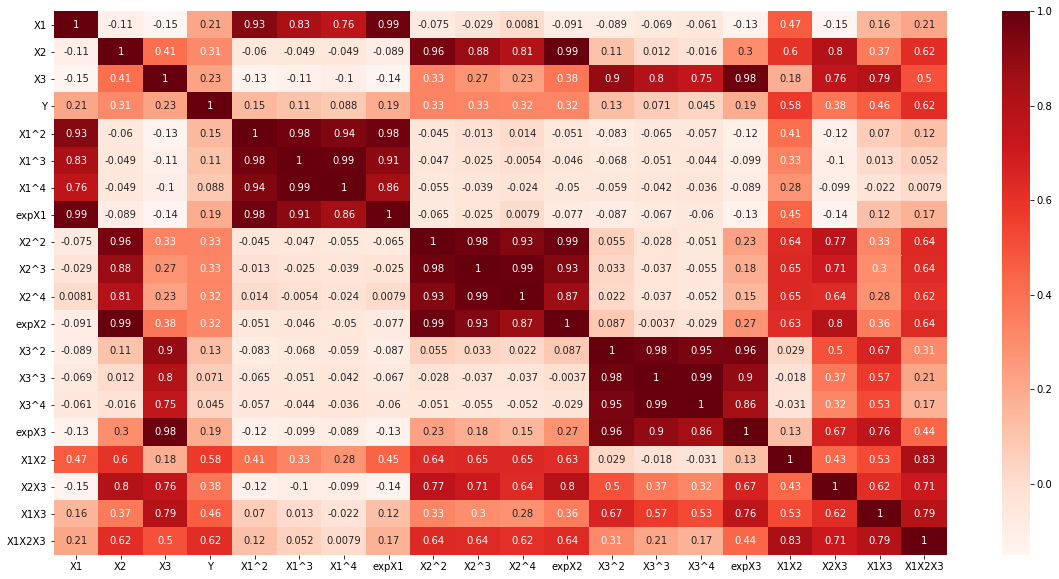

In [24]:
# Heat map for watching correlation between all features
import seaborn as sns
corr = X_new.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True, cmap = plt.cm.Reds)
plt.show()

In [25]:
#Importing Libraries
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
#Running the code 100 times
a=100
while a:
    a=a-1
    #dividing data into training(70%) and test data(30%)
    train_data = X_new.sample(frac=0.7)
    test_data = X_new.drop(train_data.index)
    
    X = train_data.drop('Y',1)
    Y = train_data['Y']
    cols = list(X.columns)
    pmax = 1
    while (len(cols)>0):    # Runs the code until length of each column is greater than zero
        p= []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(Y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    selected_features_BE = cols
    y = train_data['Y']
    x = train_data[selected_features_BE]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    if(len(selected_features_BE)>4):       # Conditions given for finding appropriate features
        print(a,"\t",results.fvalue)
    if(len(selected_features_BE)>4 and results.rsquared_adj >0.5 and results.rsquared > 0.75 and results.fvalue >= 18):
        break

print(results.summary())

x=train_data[selected_features_BE]
y=train_data[['Y']]
# Fitting Linear Regression between selected features and Y value
reg = LinearRegression().fit(x, y)
print("R^2: ",reg.score(x, y))
print("Coefficients: ",reg.coef_)
print("Intercept: ",reg.intercept_)
############################################################################
#calculating RMSE for both training and testing data
print("**************RMSE of training data:**************")
yhat=reg.predict(x)
print(np.sqrt(mean_squared_error(train_data.Y, yhat)))

print('**************RMSE of testing data:"**************')
yhat = reg.predict(test_data[selected_features_BE])
print(np.sqrt(mean_squared_error(test_data.Y, yhat)))

99 	 10.393903847633247
98 	 12.13589072736705
97 	 17.38621407173764
96 	 11.837044716847277
95 	 17.401791560823167
94 	 14.602145212220897
93 	 14.056727350520537
92 	 13.282170126811593
91 	 13.605367703315617
90 	 12.345055898126857
89 	 22.286749356389443
88 	 17.5241434225103
87 	 15.190463482854774
86 	 16.138958696180314
85 	 18.266605797844225
84 	 18.122605389676455
83 	 15.839379710850906
82 	 14.011006906301828
81 	 22.46933900717852
80 	 10.78163768304236
79 	 10.006805605437593
78 	 27.056855121415236
77 	 11.787568074769741
76 	 13.619371999228676
75 	 14.13012021683584
74 	 13.256769059296824
73 	 13.226681814359095
72 	 12.382143993548153
71 	 18.642816413912197
70 	 17.25303958608554
69 	 13.423247446786448
68 	 7.383584738983774
67 	 16.77258682648976
66 	 15.63366092054816
65 	 12.92276239588458
64 	 14.211181917823426
63 	 14.355572997731032
62 	 9.961581997279175
61 	 12.809986093795263
60 	 12.414651752460646
59 	 14.238691540803252
58 	 12.31476343372582
57 	 1

[50.6 79.2 95.7 97.6 99.  99.6 99.8 99.9 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9 99.9 99.9 99.9]


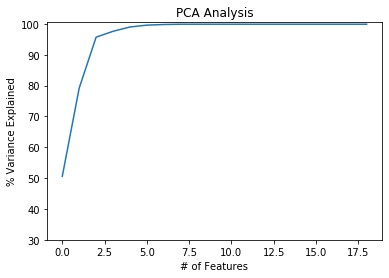

In [26]:
# Applying PCA for calculating Varience ratio of each feature
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
X=X_new.drop('Y',1)
Y=X_new['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
covar_matrix = PCA(n_components = 19)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var) #cumulative sum of variance explained with [n] features

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [27]:
#Storing the selected features in a new dataset named df_2 
df_2 = X_new[selected_features_BE]


In [28]:
#Storing Y column in a new dataset Y2 and joining Y2 with df_2
Y2 = pd.DataFrame(X_new,columns=['Y'])
df_2 = df_2.join(Y2)

In [29]:
# Calculating R^2 and Varience Inflation Factor of each selected feature
x = df_2.drop('Y',1)
y = df_2['Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
names = list(x)
print(names)
inp_df = pd.DataFrame(x, columns=names)
for i in range(0,len(names)):
    Y = x.loc[:,inp_df.columns == names[i]]
    X = x.loc[:,inp_df.columns != names[i]]
    model = sm.OLS(Y,X)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq) ,2)
    print('values of R^2',rsq)
    print('values of VIF',vif)

['X3', 'X3^2', 'X3^3', 'X3^4', 'expX3', 'X1X2']
values of R^2 0.9919990879346471
values of VIF 124.99
values of R^2 0.9997022834609176
values of VIF 3358.9
values of R^2 0.9999226620439149
values of VIF 12930.26
values of R^2 0.9997709885416202
values of VIF 4366.59
values of R^2 0.6312471742679677
values of VIF 2.71
values of R^2 0.3584191015685766
values of VIF 1.56


Beta value for each lambda:
[array([ 1.14966940e+03, -6.07405591e+01, -1.54530923e+04,  5.75331099e+02,
        1.78406990e+02,  7.10072136e+01, -1.14906258e+03, -2.35704614e+01,
       -1.73041819e+01, -8.29406179e-02,  5.91318397e+01, -7.77481167e+03,
       -2.36804554e+03, -9.61991897e+02,  1.54561321e+04,  1.42761440e+00,
        1.12628256e-01,  6.75358925e-01, -2.56454836e+00]), array([ 1.1387304 , -1.82679039, -0.66312157, -3.48938167,  3.65546011,
       -1.02910165, -0.17310379,  5.94363659, -9.43906889,  4.43932271,
        0.30654146,  0.39645023,  1.00004172, -1.11710632, -0.02277002,
        1.53404366,  1.73632787,  1.83241807, -3.41304858]), array([ 1.01898653, -1.64939505, -0.57699127, -3.04149458,  2.82628732,
       -0.57944556, -0.14796437,  5.40674237, -8.48110717,  3.95518288,
        0.23637148,  0.43362716,  0.96213048, -1.0684787 , -0.09857026,
        1.53641194,  1.71169698,  1.79497756, -3.2334749 ]), array([ 0.94004262, -1.52154331, -0.54561849, -2.74142389

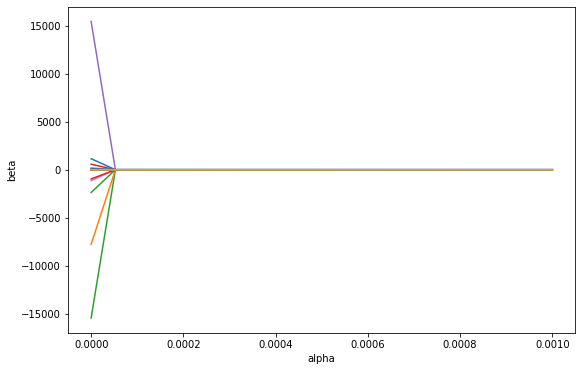

In [30]:
#performing 10 fold cross validation on ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)      # Doing 20 times iteration from 0 to 0.001
RMSE_avg_array=[]
R_avg_array=[]
coefs = []
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]

        ridge_model=Ridge()             
        ridge_model.set_params(alpha=a)
        ridge_model.fit(x, y)            #Fitting Ridge Model
        coefs.append(ridge_model.coef_)  #Appending the coefficient of different features
        
        kf = KFold(n_splits=10)          #Splitting the dataset into 10 Folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ridge_model.set_params(alpha=a)
            ridge_model.fit(X_train, y_train)
            yhat = ridge_model.predict(X_test)             #Finding predicted value of y
            RMSE=np.sqrt(mean_squared_error(y_test, yhat)) #Finding Root mean square error 
            RMSE_array.append(RMSE)
            R_sq=(ridge_model.score(X_train, y_train)) #Finding R^2 value
            R_sq_array.append(R_sq)
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:\n")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)

# Plotting the alpha vs beta plot
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [31]:
# Smallest RMSE and Maximun R^2 value using Ridge model
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.13855169802680328
Maximum R^2 value is: 0.5928489736398546


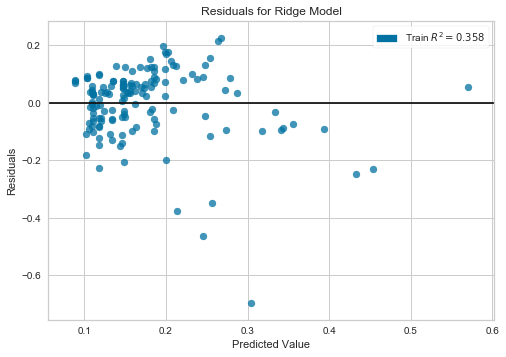

In [32]:
#Plotting residual plot of ridge method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)  
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9398223766633603, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages

Beta value for each lambda:
[array([ 0.52838694, -0.65734776, -0.46304577, -1.8966491 ,  0.66709598,
        0.55072242,  0.03582102,  1.1319626 , -1.40075061,  0.38626921,
        0.06961602,  0.7146352 ,  0.15770001, -0.46863767, -0.2305592 ,
        1.65699773,  1.78482265,  1.81755266, -3.17305543]), array([ 0.37366224, -0.34258702, -0.2453655 , -1.14146285,  0.        ,
        0.70435455,  0.        ,  0.16256032, -0.        , -0.21403175,
       -0.        ,  0.        , -0.        , -0.02870519, -0.        ,
        1.32336774,  1.31861561,  0.62665513,  0.        ]), array([ 0.22704915, -0.27002043, -0.06742179, -0.77319272,  0.        ,
        0.46313554,  0.        ,  0.        , -0.        , -0.11148118,
       -0.        ,  0.        , -0.        , -0.        , -0.0944433 ,
        1.33394475,  1.27697195,  0.36992055,  0.        ]), array([ 0.08053381, -0.26412502, -0.        , -0.40632544, -0.        ,
        0.22566   ,  0.        ,  0.        , -0.        , -0.107407

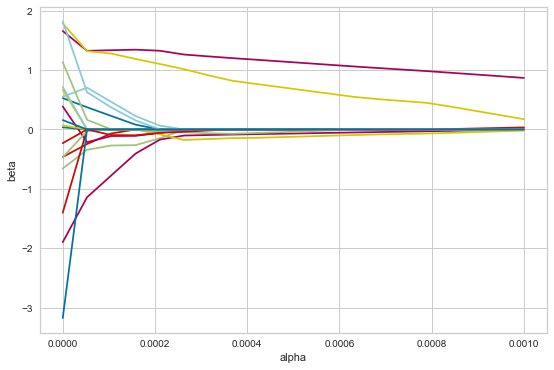

In [33]:
#performing 10 fold cross validation on LASSO regression
from sklearn import linear_model
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001,20 )    # Doing 20 times iterations from 0 to 0.001
RMSE_avg_array=[]
R_avg_array=[]
coefs = []
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        
        lasso_model = linear_model.Lasso(alpha=a)
        lasso_model.fit(x, y)
        coefs.append(lasso_model.coef_)
        
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            lasso_model.set_params(alpha=a)
            lasso_model.fit(X_train, y_train)
            yhat = lasso_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(lasso_model.score(X_train, y_train))    
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)
print("-------------------------------")


#Plot between alpha and beta
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [34]:
#Smallest RMSE and Maximum R^2 using Lasso regression
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.12552951353664793
Maximum R^2 value is: 0.46973340420814846


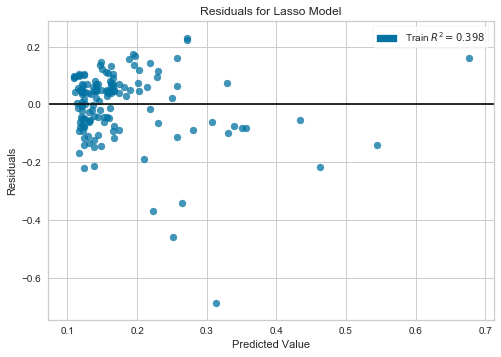

In [35]:
#Plotting residual plot of Lasso method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = linear_model.Lasso(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0097386001941802, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages

Beta value for each lambda:
[array([  0.66486397,  -0.7269661 ,  -0.46312629,  -2.19687762,
         0.36388803,   0.98692411,   0.07720559,   1.29268084,
        -1.32514105,   0.40360284,  -0.02548682,   0.50975528,
        -0.84370243,   0.20796581,  -0.06176324,   2.17138264,
         1.93649228,   5.8405577 , -11.51036102]), array([ 0.57899116, -0.40308738,  0.        , -1.41221091, -0.        ,
        0.84548026,  0.        ,  0.57359555, -0.13645386, -0.2520696 ,
       -0.04225885,  0.14462898, -0.        , -0.35967846,  0.06199418,
        1.29442785,  0.54833055,  0.87829966, -0.93307241]), array([ 0.43332026, -0.32111571,  0.        , -1.04647228, -0.        ,
        0.61929275,  0.        ,  0.28233653, -0.        , -0.22048167,
       -0.        ,  0.        , -0.        , -0.29627883,  0.13104927,
        1.15342991,  0.42038645,  0.55680782, -0.        ]), array([ 0.3232448 , -0.23771204,  0.00292367, -0.78327662, -0.        ,
        0.45470772,  0.        ,  0.123411

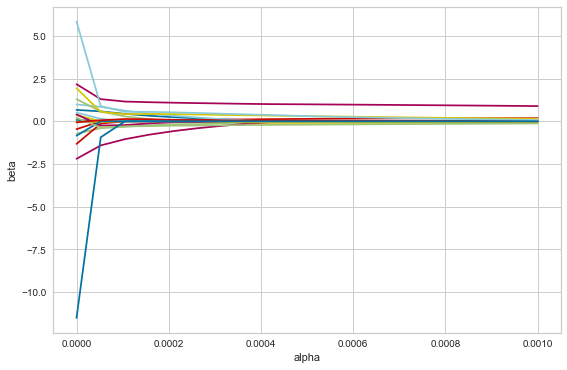

In [135]:
#performing 10 fold cross validation on elastic net
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)   #Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        ElasticNet_model = ElasticNet(alpha=a)
        ElasticNet_model.fit(x, y)
        coefs.append(ElasticNet_model.coef_)
        
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ElasticNet_model.set_params(alpha=a)
            ElasticNet_model.fit(X_train, y_train)
            yhat = ElasticNet_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(ElasticNet_model.score(X_train, y_train))    
        R_avg_array.append(np.average(R_sq_array))
        RMSE_avg_array.append(np.average(RMSE_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)

print("-------------------------------------")


#Plotting between alpha and beta
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')


plt.show()

In [37]:
#Smallest RMSE and Maximum R^2 value using Elastic Net Regression
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.12949351429815845
Maximum R^2 value is: 0.4873002980320501


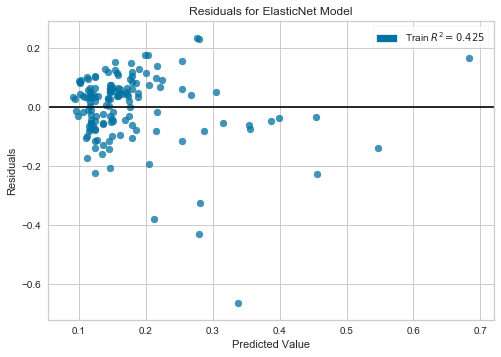

In [38]:
#Plotting residual plot of Elastic Net method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ElasticNet(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [39]:
#Creating new train and test data 
X = df_2.drop('Y',1)
Y = df_2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

RMSE value for k=  1 is: 0.16341995144019908
RMSE value for k=  2 is: 0.16178887778961498
RMSE value for k=  3 is: 0.1727051480014503
RMSE value for k=  4 is: 0.16683638824975175
RMSE value for k=  5 is: 0.17491180480383853
RMSE value for k=  6 is: 0.16512514419645918
RMSE value for k=  7 is: 0.16031706366740783
RMSE value for k=  8 is: 0.16050518287759064
RMSE value for k=  9 is: 0.15520841026765966
RMSE value for k=  10 is: 0.1504360537393385
RMSE value for k=  11 is: 0.1519169939691914
RMSE value for k=  12 is: 0.15366580120586812
RMSE value for k=  13 is: 0.14997670472633184
RMSE value for k=  14 is: 0.15319893451404476
RMSE value for k=  15 is: 0.1535395711613951
RMSE value for k=  16 is: 0.15651945896460973
RMSE value for k=  17 is: 0.15644352840020848
RMSE value for k=  18 is: 0.15682400404251093
RMSE value for k=  19 is: 0.1581774680947866
RMSE value for k=  20 is: 0.1593559113237485
RMSE value for k=  21 is: 0.16099950440884625
RMSE value for k=  22 is: 0.16199781064990953
RMS

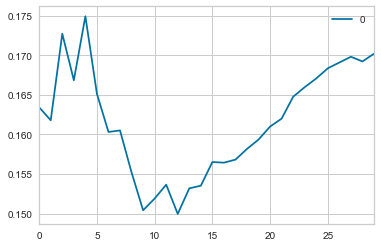

In [40]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
print(min(rmse_val))
V = rmse_val.index(np.min(rmse_val))
best_k = V+1
print('Best Value of K is:',best_k)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [41]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                          # Using the 5fold model to find the best train and test set
RMSE_array8=[] 
RMSE_array9=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
        model.fit(X_train, y_train)  
        yhat=model.predict(X_test)  
        y_pred_train = model.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array8.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array9.append(RMSE_train)
        R_sq = model.score(X_train, y_train)
        R_sq_array.append(R_sq)
        print("RMSE_test: ",RMSE_test," RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array8)," , ",min(RMSE_array8),"]")
print("RMSE_train_Range = [",max(RMSE_array9)," , ",min(RMSE_array9),"]")
print(np.mean(R_sq_array))

RMSE_test:  0.27592446093917794  RMSE_train:  0.09704402074668303
R^2:  0.19577179720893045
RMSE_test:  0.15473916594114212  RMSE_train:  0.12078418301347461
R^2:  0.32861802833502374
RMSE_test:  0.14253333485628342  RMSE_train:  0.13249460680129493
R^2:  0.3409246310793529
RMSE_test:  0.08301552339002782  RMSE_train:  0.13369520258926157
R^2:  0.3449023171416231
RMSE_test:  0.0883890175549657  RMSE_train:  0.1347467072636496
R^2:  0.31522818768932775
RMSE_test_Range = [ 0.27592446093917794  ,  0.08301552339002782 ]
RMSE_train_Range = [ 0.1347467072636496  ,  0.09704402074668303 ]
0.37061664511872866


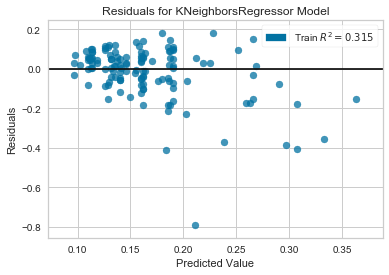

In [42]:
#Plotting residual plot of KNN Regression method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [43]:
#Random forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop =200, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   17.2s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [45]:
#Storing the best parameter
param_rf = rf_random.best_params_

In [46]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)               #using 5Fold model to find the best train and test set
RMSE_array2=[]
RMSE_array7=[]
R_sq_array2=[] 
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor = RandomForestRegressor(**param_rf)
        regressor.fit(X_train, y_train)  
        yhat=regressor.predict(X_test)  
        y_pred_train = regressor.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array2.append(RMSE_test)
        RMSE_array7.append(RMSE_train)
        R_sq = regressor.score(X_train, y_train)
        R_sq_array2.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array2)," , ",min(RMSE_array2),"]")
print("RMSE_train_Range = [",max(RMSE_array7)," , ",min(RMSE_array7),"]")
print(np.mean(R_sq_array2))


RMSE_test:  0.21493469964574793 RMSE_train:  0.06573745543536592
R^2:  0.630965037143241
RMSE_test:  0.17726020287534452 RMSE_train:  0.058982069423398495
R^2:  0.8399006550659076
RMSE_test:  0.11814428324966753 RMSE_train:  0.06592020402274303
R^2:  0.8368542496229745
RMSE_test:  0.04862081925240359 RMSE_train:  0.07409902155183434
R^2:  0.7987669254583597
RMSE_test:  0.14649675129743012 RMSE_train:  0.07320376097705071
R^2:  0.7978953337252508
RMSE_test_Range = [ 0.21493469964574793  ,  0.04862081925240359 ]
RMSE_train_Range = [ 0.07409902155183434  ,  0.058982069423398495 ]
0.7808764402031467


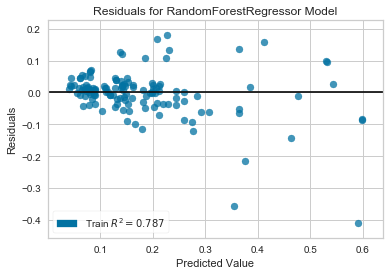

In [47]:
#Plotting residual plot for Random forest method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = RandomForestRegressor(**param_rf)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [48]:
#Gradient Boosting Method
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01,0.1,1],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1,2,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 1949 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2153 out of 2160 | elapsed:  1.7min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.8min finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [49]:
#Storing the best parameter
grad_parameter=grid_search.best_params_

In [50]:
# Fitting Boosting method to the Dataset
#import the libraries
from sklearn import ensemble
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                      # Applying the 5fold cross validation method
RMSE_array3=[]
R_sq_array3=[] 
RMSE_array10=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**grad_parameter)
        Boost=gradient_boosting_regressor.fit(X_train, y_train)       
        yhat=Boost.predict(X_test)  
        y_pred_train = Boost.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array3.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array10.append(RMSE_train)
        R_sq = Boost.score(X_train, y_train)
        R_sq_array3.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array3)," , ",min(RMSE_array3),"]")
print("RMSE_train_Range = [",max(RMSE_array10)," , ",min(RMSE_array10),"]")
print(np.mean(R_sq_array3))


RMSE_test:  0.2253635925475742 RMSE_train:  0.07253301350653812
R^2:  0.5507240433653053
RMSE_test:  0.18275657378147833 RMSE_train:  0.07205836287989417
R^2:  0.7610437880510806
RMSE_test:  0.10559696409281878 RMSE_train:  0.09029789012775578
R^2:  0.693878462589213
RMSE_test:  0.05699384128042475 RMSE_train:  0.09584588334695555
R^2:  0.6633168787909105
RMSE_test:  0.11389926008822072 RMSE_train:  0.08949557497239875
R^2:  0.6979264654354748
RMSE_test_Range = [ 0.2253635925475742  ,  0.05699384128042475 ]
RMSE_train_Range = [ 0.09584588334695555  ,  0.07205836287989417 ]
0.6733779276463968


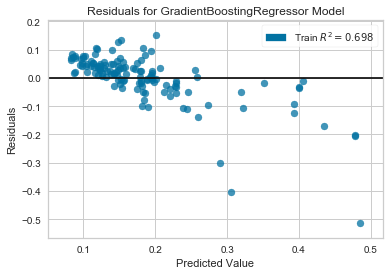

In [51]:
#Plotting residual plot for Gradient Boosting method
from sklearn import ensemble
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ensemble.GradientBoostingRegressor(**grad_parameter)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [52]:
#Decision Tree Regressor Method
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'min_samples_leaf': [1,2,3,4,5],
}

dr= DecisionTreeRegressor()
grid_searc = GridSearchCV(estimator = dr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_searc.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [53]:
#Storing the best parameter
params_dr=grid_searc.best_params_
print(params_dr)

{'min_samples_leaf': 2}


In [54]:
# Fitting Decision Tree method to the dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)         # Using 5fold cross validation method to find the best train and test data
RMSE_array4=[]
R_sq_array4=[] 
RMSE_array5=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr = DecisionTreeRegressor(**params_dr)
        regr.fit(X_train,y_train)
        yhat=regr.predict(X_test) 
        y_pred_train = regr.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array4.append(RMSE_test)
        RMSE_array5.append(RMSE_train)
        R_sq = regr.score(X_train, y_train)
        R_sq_array4.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array4)," , ",min(RMSE_array4),"]")
print("RMSE_train_Range = [",max(RMSE_array5)," , ",min(RMSE_array5),"]")
print(np.mean(R_sq_array4))



RMSE_test:  0.3007798382973389 RMSE_train:  0.046407836121575376
R^2:  0.8160819419643452
RMSE_test:  0.2695204348133665 RMSE_train:  0.0535250700204218
R^2:  0.8681548886928788
RMSE_test:  0.13873619644385018 RMSE_train:  0.06127456191928527
R^2:  0.8590389552133776
RMSE_test:  0.07193478385942319 RMSE_train:  0.07628461675150904
R^2:  0.7867208735076727
RMSE_test:  0.1982269152671927 RMSE_train:  0.07710294853395597
R^2:  0.7757917829518258
RMSE_test_Range = [ 0.3007798382973389  ,  0.07193478385942319 ]
RMSE_train_Range = [ 0.07710294853395597  ,  0.046407836121575376 ]
0.82115768846602


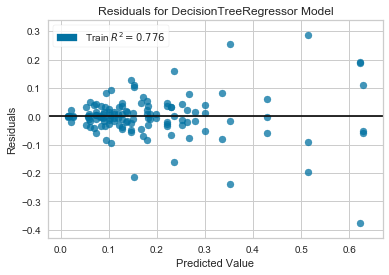

In [55]:
#Plotting residual plot for Decision tree method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = DecisionTreeRegressor(**params_dr)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

# Imputing the missing values with Median

In [56]:
# Substituting 10% of dataset with NaN values
p=df_1_.values
l=p.tolist()
for j in range(0,3):
    samp=random.sample(range(0,161),16)
    for i in range(16):
        l[samp[i]][j]=np.nan       
X_NEW=pd.DataFrame(l)
X_NEW.columns=['X1','X2','X3','Y1']
X_NEW

,X1,X2,X3,Y1
0,0.204545,NaN,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.240946,0.367621
3,0.431818,0.498747,0.180703,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,1.000000,0.120461,0.680888
6,0.659091,0.498747,0.240946,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [57]:
#Imputing Data With Median
from sklearn.impute import SimpleImputer
median_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
median_imputer = median_imputer.fit(X_NEW)
imputed_df = median_imputer.transform(X_NEW)
dataset = pd.DataFrame({'X1': imputed_df[:, 0], 'X2': imputed_df[:, 1],'X3':imputed_df[:,2]})


C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [58]:
#Adding column Y1 to dataset
dataset['Y']= X_NEW['Y1']


In [59]:
dataset

,X1,X2,X3,Y
0,0.204545,0.075188,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.240946,0.367621
3,0.431818,0.498747,0.180703,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,1.000000,0.120461,0.680888
6,0.659091,0.498747,0.240946,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [60]:
# Storing different X columns in X and Y column in Y1
X_new=dataset
X=pd.DataFrame(X_new,columns=['X1','X2','X3'])
Y1=pd.DataFrame(X_new,columns=['Y'])

In [61]:
# Fitting ordinary least square method to the dataset
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y1,X).fit()
model.summary()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           2.32e-06
Time:                        23:38:50   Log-Likelihood:                 90.218
No. Observations:                 162   AIC:                            -172.4
Df Residuals:                     158   BIC:                            -160.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0781      0.019      4.079      0.000       0.040       0.116
X1             0.2271      0.058      3.884      0.000       0.112       0.343
X2             0.1008      0.043      2.324      0.021       0.015       0.187
X3             0.1787      0.076      2.361      0.019       0.029       0.328
==============================================================================
Omnibus:                       65.403   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.061
Skew:                           1.583   Prob(JB):                     2.00e-47
Kurtosis:                       7.673   Cond. No.                         7.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Creating new features from the existing dataset
X_new['X1^2'] = X_new.X1*X_new.X1
X_new['X1^3'] = X_new.X1*X_new.X1*X_new.X1
X_new['X1^4'] = X_new.X1*X_new.X1*X_new.X1*X_new.X1
X_new['expX1'] = np.exp(X_new.X1)
X_new['X2^2'] = X_new.X2*X_new.X2
X_new['X2^3'] = X_new.X2*X_new.X2*X_new.X2
X_new['X2^4'] = X_new.X2*X_new.X2*X_new.X2*X_new.X2
X_new['expX2'] = np.exp(X_new.X2)
X_new['X3^2'] = X_new.X3*X_new.X3
X_new['X3^3'] = X_new.X3*X_new.X3*X_new.X3
X_new['X3^4'] = X_new.X3*X_new.X3*X_new.X3*X_new.X3
X_new['expX3'] = np.exp(X_new.X3)
X_new['X1X2'] = X_new.X1*X_new.X2
X_new['X2X3'] = X_new.X2*X_new.X3
X_new['X1X3'] = X_new.X1*X_new.X3
X_new['X1X2X3'] = X_new.X1*X_new.X2*X_new.X3

In [63]:
# Splitting dataset into train and test data
train_data = X_new.sample(frac=0.70)
test_data = X_new.drop(train_data.index)    
X = train_data.drop('Y',1)
Y = train_data['Y']

In [64]:
# Applying Least square method to the newly created features
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     8.695
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.68e-13
Time:                        23:38:51   Log-Likelihood:                 105.17
No. Observations:                 113   AIC:                            -170.3
Df Residuals:                      93   BIC:                            -115.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.057e+04   3880.515     -2.723      0.008   -1.83e+04   -2861.131
X1          1102.9675   1876.137      0.588      0.558   -2622.668    4828.603
X2          -197.5199    903.485     -0.219      0.827   -1991.662    1596.622
X3         -1.147e+04   3585.410     -3.199      0.002   -1.86e+04   -4349.093
X1^2         548.8151    946.730      0.580      0.564   -1331.202    2428.833
X1^3         172.7852    282.785      0.611      0.543    -388.770     734.341
X1^4          68.1488    119.605      0.570      0.570    -169.363     305.661
expX1      -1101.4461   1876.886     -0.587      0.559   -4828.570    2625.678
X2^2         -97.0256    458.934     -0.211      0.833   -1008.377     814.326
X2^3         -32.3644    130.357     -0.248      0.804    -291.227     226.498
X2^4         -11.4653     61.033     -0.188      0.851    -132.665     109.734
expX2        196.7360    904.207      0.218      0.828   -1598.840    1992.312
X3^2       -5771.5354   1807.150     -3.194      0.002   -9360.177   -2182.893
X3^3       -1759.0984    543.625     -3.236      0.002   -2838.631    -679.566
X3^4        -712.3026    226.661     -3.143      0.002   -1162.406    -262.199
expX3       1.147e+04   3586.477      3.199      0.002    4349.758    1.86e+04
X1X2           2.0454      0.614      3.329      0.001       0.825       3.266
X2X3           1.2696      1.060      1.198      0.234      -0.835       3.374
X1X3           1.0066      1.894      0.531      0.596      -2.755       4.769
X1X2X3        -6.3446      4.711     -1.347      0.181     -15.700       3.011
==============================================================================
Omnibus:                       37.509   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.295
Skew:                           1.090   Prob(JB):                     1.87e-29
Kurtosis:                       7.832   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#Importing libraries
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
#Running for loop 100 times
a=100
while a:
    a=a-1
    #dividing data into training(70%) and test data(30%)
    train_data = X_new.sample(frac=0.7)
    test_data = X_new.drop(train_data.index)
    
    X = train_data.drop('Y',1)
    Y = train_data['Y']
    cols = list(X.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(Y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    selected_features_BE = cols
    y = train_data['Y']
    x = train_data[selected_features_BE]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    if(len(selected_features_BE)>4):             #Conditions given to be satisfied
        print(a,"\t",results.fvalue)
    if(len(selected_features_BE)>4 and results.rsquared_adj >0.5 and results.rsquared > 0.75 and results.fvalue >= 18):
        break

print(results.summary())

# Fitting the selected features with least square method
x=train_data[selected_features_BE]
y=train_data[['Y']]

reg = LinearRegression().fit(x, y)
print("R^2: ",reg.score(x, y))
print("Coefficients: ",reg.coef_)
print("Intercept: ",reg.intercept_)
############################################################################
#calculating RMSE for both training and testing data
print("**************RMSE of training data:**************")
yhat=reg.predict(x)
print(np.sqrt(mean_squared_error(train_data.Y, yhat)))

print('**************RMSE of testing data:"**************')
yhat = reg.predict(test_data[selected_features_BE])
print(np.sqrt(mean_squared_error(test_data.Y, yhat)))

99 	 14.619594813823673
98 	 14.766396878887143
97 	 15.39961894214891
96 	 12.266635573061821
95 	 25.6453720595254
94 	 12.90350267196809
93 	 16.288551434250316
92 	 12.025094851672442
91 	 13.61116364526971
90 	 13.848692822173156
89 	 17.45000697185652
88 	 12.440153090090373
87 	 15.549022492001416
86 	 12.926966540460777
85 	 11.458299496637192
84 	 13.269951025726591
83 	 14.403475343496813
82 	 13.517667141347204
81 	 16.0329422983808
80 	 7.919659026712246
79 	 14.607101688774106
78 	 13.657616845275774
77 	 16.009334620811355
76 	 16.396176544500396
75 	 10.936786954513977
74 	 15.036572112281688
73 	 19.48933980265579
72 	 14.382878438210469
71 	 17.115948127622175
70 	 11.790735193198108
69 	 16.1721383198456
68 	 19.891858199505283
67 	 15.96522825164635
66 	 18.447267005497157
65 	 16.739324206150915
64 	 17.764787844639635
63 	 11.034999611576403
62 	 11.587869448836287
61 	 9.445037090817417
60 	 11.946855935449578
59 	 14.492983528061506
58 	 17.805548018242757
57 	 1

[54.6 84.9 95.9 97.7 99.1 99.6 99.8 99.9 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9 99.9 99.9 99.9]


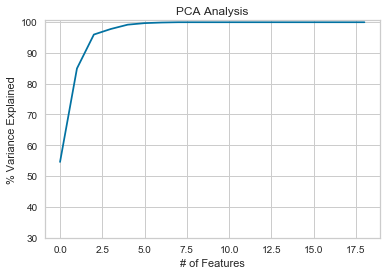

In [66]:
# Applying PCA for calculating Varience ratio of each feature
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
X=X_new.drop('Y',1)
Y=X_new['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
covar_matrix = PCA(n_components = 19)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var) #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [67]:
# Creating new dataset for selected features and joining Y column 
df_2 = X_new[selected_features_BE]
Y2 = pd.DataFrame(X_new,columns=['Y'])
df_2 = df_2.join(Y2)
df_2

,X1,X3,X1^4,expX1,expX2,X3^2,X3^3,X3^4,expX3,X1X2,X2X3,X1X2X3,Y
0,0.204545,0.120461,1.750489e-03,1.226967,1.078087,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.015379,9.057198e-03,1.852609e-03,0.398013
1,0.204545,0.180703,1.750489e-03,1.226967,2.115674,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.153281,1.354141e-01,2.769835e-02,0.368790
2,0.204545,0.240946,1.750489e-03,1.226967,2.718282,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.204545,2.409456e-01,4.928432e-02,0.367621
3,0.431818,0.180703,3.476992e-02,1.540055,1.646656,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.215368,9.012513e-02,3.891767e-02,0.415546
4,0.431818,0.240946,3.476992e-02,1.540055,2.115674,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.323593,1.805582e-01,7.796832e-02,0.486850
5,0.431818,0.120461,3.476992e-02,1.540055,2.718282,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.431818,1.204607e-01,5.201714e-02,0.680888
6,0.659091,0.240946,1.887041e-01,1.933034,1.646656,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.328720,1.201708e-01,7.920351e-02,0.429573
7,0.659091,0.120461,1.887041e-01,1.933034,2.115674,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.493905,9.027007e-02,5.949619e-02,0.685564
8,0.659091,0.180703,1.887041e-01,1.933034,2.718282,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.659091,1.807031e-01,1.190998e-01,0.516072
9,0.318182,0.000096,1.024947e-02,1.374626,1.080792,9.290620e-09,8.955031e-13,8.631563e-17,1.000096,0.024721,7.488781e-06,2.382794e-06,0.118258


In [68]:
# Finding R^2 and Variation Inflation Factor of selected features
x = df_2.drop('Y',1)
y = df_2['Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
names = list(x)
print(names)
inp_df = pd.DataFrame(x, columns=names)
for i in range(0,len(names)):
    Y = x.loc[:,inp_df.columns == names[i]]
    X = x.loc[:,inp_df.columns != names[i]]
    model = sm.OLS(Y,X)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq) ,2)
    print('values of R^2',rsq)
    print('values of VIF',vif)

['X1', 'X3', 'X1^4', 'expX1', 'expX2', 'X3^2', 'X3^3', 'X3^4', 'expX3', 'X1X2', 'X2X3', 'X1X2X3']
values of R^2 0.9993419521266222
values of VIF 1519.65
values of R^2 0.9983463038051911
values of VIF 604.71
values of R^2 0.9881219794629664
values of VIF 84.19
values of R^2 0.9999532171303892
values of VIF 21375.35
values of R^2 0.9944956411577434
values of VIF 181.67
values of R^2 0.9998249038359496
values of VIF 5711.15
values of R^2 0.9999462950564234
values of VIF 18620.26
values of R^2 0.9998314615945815
values of VIF 5933.37
values of R^2 0.9999412544235199
values of VIF 17022.56
values of R^2 0.9576299837149844
values of VIF 23.6
values of R^2 0.9719563337644144
values of VIF 35.66
values of R^2 0.9476461957005087
values of VIF 19.1


Beta value for each lambda:
[array([ 4.00876075e+02,  2.05465298e+02, -1.32790810e+04,  1.97962851e+02,
        6.23194991e+01,  2.58237963e+01, -3.99802893e+02,  1.09656460e+02,
        2.32106615e+01,  1.70085508e+01, -2.07033122e+02, -6.68512736e+03,
       -2.02968537e+03, -8.29168154e+02,  1.32823485e+04,  2.18083824e+00,
        1.40548613e+00,  1.39587830e+00, -6.26758976e+00]), array([ 1.28023054e+00, -1.10895215e+00, -8.59978333e-01, -3.17437935e+00,
        7.67614334e-01,  1.28499037e+00, -1.00429585e-01,  3.60973180e+00,
       -5.68659626e+00,  2.69792674e+00, -2.04502942e-03,  2.98781254e+00,
       -5.92992578e+00,  2.93722931e+00,  2.81443671e-01,  2.24888332e+00,
        1.85943133e+00,  1.40455643e+00, -5.69721310e+00]), array([ 1.22491057, -1.04360926, -0.6222633 , -2.92744028,  0.33645766,
        1.51459461, -0.09579187,  3.25023665, -5.06391862,  2.36754605,
       -0.00562686,  2.22237601, -4.20107691,  1.95804403,  0.15816453,
        2.2257901 ,  1.85297134,  1

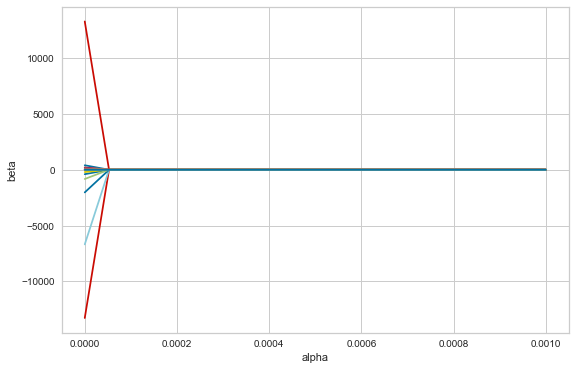

In [69]:
#performing 10 fold cross validation on ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)          # Doing iteration 20 times from 0 to 0.001 
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]

        ridge_model=Ridge()
        ridge_model.set_params(alpha=a)
        ridge_model.fit(x, y)
        coefs.append(ridge_model.coef_)
        
        kf = KFold(n_splits=10)                     # Splitting the dataset into 10 folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ridge_model.set_params(alpha=a)
            ridge_model.fit(X_train, y_train)
            yhat = ridge_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(ridge_model.score(X_train, y_train))    
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:\n")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)


# Plot between alpha and beta
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [70]:
# Calculating the smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.1250206801494591
Maximum R^2 value is: 0.6210153688230127


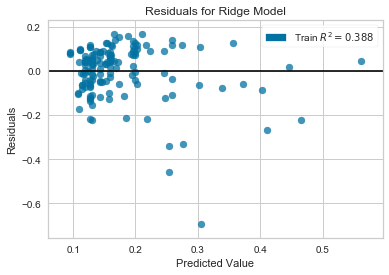

In [71]:
#Plotting residual plot of ridge method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0097386001941802, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages

Beta value for each lambda:
[array([  0.66486397,  -0.7269661 ,  -0.46312629,  -2.19687762,
         0.36388803,   0.98692411,   0.07720559,   1.29268084,
        -1.32514105,   0.40360284,  -0.02548682,   0.50975528,
        -0.84370243,   0.20796581,  -0.06176324,   2.17138264,
         1.93649228,   5.8405577 , -11.51036102]), array([ 0.59553732, -0.3786435 ,  0.        , -1.4459759 , -0.        ,
        0.86339823,  0.        ,  0.35982527, -0.        , -0.26474985,
       -0.        ,  0.        , -0.        , -0.29244797,  0.11524593,
        1.27874149,  0.52583549,  0.71776051, -0.63373085]), array([ 4.01713103e-01, -1.85303220e-01,  0.00000000e+00, -9.83857037e-01,
       -0.00000000e+00,  5.77507266e-01,  0.00000000e+00,  4.48337360e-04,
       -0.00000000e+00, -5.56272614e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.71996137e-01,  1.10188956e-01,  1.15984577e+00,
        4.75680114e-01,  4.95866481e-01, -0.00000000e+00]), array([ 0.20433152, -0.17421998

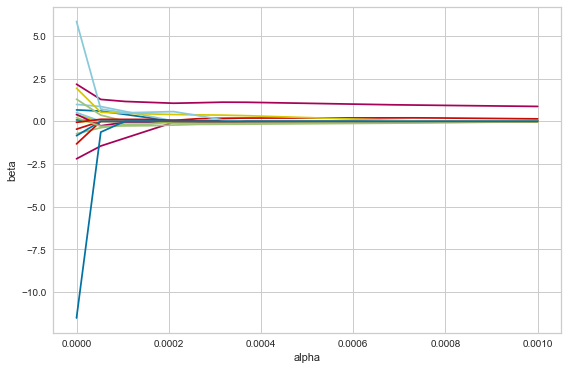

In [139]:
#performing 10 fold cross validation on LASSO regression
from sklearn import linear_model
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001,20 )                 # Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array = []
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        
        lasso_model = linear_model.Lasso(alpha=a)
        lasso_model.fit(x, y)
        coefs.append(lasso_model.coef_)
        
        kf = KFold(n_splits=10)                    #Splitting the dataset into 10 folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            lasso_model.set_params(alpha=a)
            lasso_model.fit(X_train, y_train)
            yhat = lasso_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(lasso_model.score(X_train, y_train))    
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)
print("-------------------------------")


#Plot between alpha and beta
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [140]:
# Calculating the smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.1334586896436055
Maximum R^2 value is: 0.359897560570412


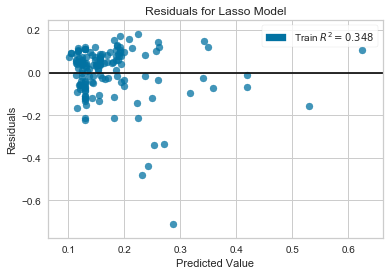

In [141]:
#Plotting residual plot of Lasso method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = linear_model.Lasso(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)  
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0097386001941802, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\line

Beta value for each lambda:
[array([  0.66486397,  -0.7269661 ,  -0.46312629,  -2.19687762,
         0.36388803,   0.98692411,   0.07720559,   1.29268084,
        -1.32514105,   0.40360284,  -0.02548682,   0.50975528,
        -0.84370243,   0.20796581,  -0.06176324,   2.17138264,
         1.93649228,   5.8405577 , -11.51036102]), array([ 0.57899116, -0.40308738,  0.        , -1.41221091, -0.        ,
        0.84548026,  0.        ,  0.57359555, -0.13645386, -0.2520696 ,
       -0.04225885,  0.14462898, -0.        , -0.35967846,  0.06199418,
        1.29442785,  0.54833055,  0.87829966, -0.93307241]), array([ 0.43332026, -0.32111571,  0.        , -1.04647228, -0.        ,
        0.61929275,  0.        ,  0.28233653, -0.        , -0.22048167,
       -0.        ,  0.        , -0.        , -0.29627883,  0.13104927,
        1.15342991,  0.42038645,  0.55680782, -0.        ]), array([ 0.3232448 , -0.23771204,  0.00292367, -0.78327662, -0.        ,
        0.45470772,  0.        ,  0.123411

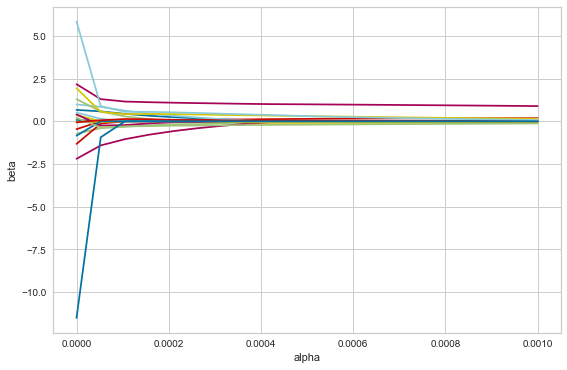

In [144]:
#performing 10 fold cross validation on elastic net
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)               # Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        
        ElasticNet_model = ElasticNet(alpha=a)
        ElasticNet_model.fit(x, y)
        coefs.append(ElasticNet_model.coef_)
        
        kf = KFold(n_splits=10)                 #Splitting the dataset into 10 folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ElasticNet_model.set_params(alpha=a)
            ElasticNet_model.fit(X_train, y_train)
            yhat = ElasticNet_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(ElasticNet_model.score(X_train, y_train))    

        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)

print("-------------------------------------")

#Plot between alpha and beta
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')


plt.show()

In [76]:
# Calculating the smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.1246981535548742
Maximum R^2 value is: 0.5217502790031961


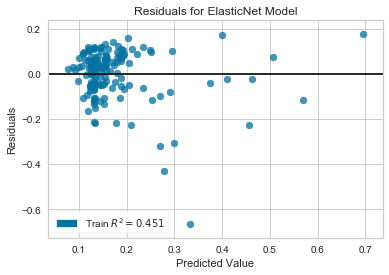

In [77]:
#Plotting residual plot of Elastic Net method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ElasticNet(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)  
g = visualizer.poof()

In [78]:
#Creating new train and test dataset
X = df_2.drop('Y',1)
Y = df_2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

RMSE value for k=  1 is: 0.1451493715626347
RMSE value for k=  2 is: 0.15799868937900938
RMSE value for k=  3 is: 0.1414748998503309
RMSE value for k=  4 is: 0.12771243952172473
RMSE value for k=  5 is: 0.13574111843566403
RMSE value for k=  6 is: 0.14434279730246188
RMSE value for k=  7 is: 0.1447994165428469
RMSE value for k=  8 is: 0.1477238248562775
RMSE value for k=  9 is: 0.1521013413712679
RMSE value for k=  10 is: 0.14857040823374956
RMSE value for k=  11 is: 0.15392895395240191
RMSE value for k=  12 is: 0.15680346762511493
RMSE value for k=  13 is: 0.15486988157891105
RMSE value for k=  14 is: 0.15887462408551475
RMSE value for k=  15 is: 0.16009567192877033
RMSE value for k=  16 is: 0.1629774690990995
RMSE value for k=  17 is: 0.16291672243191643
RMSE value for k=  18 is: 0.1649095042580846
RMSE value for k=  19 is: 0.1674365653915535
RMSE value for k=  20 is: 0.1682755784265993
RMSE value for k=  21 is: 0.168723751812682
RMSE value for k=  22 is: 0.16960887203764918
RMSE val

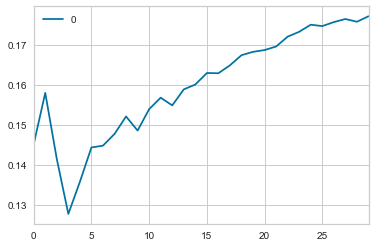

In [79]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
V = rmse_val.index(np.min(rmse_val))
best_k = V+1
print('Best Value of K is:',best_k)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [80]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                          # Using the 5fold model to find the best train and test set
RMSE_array8=[] 
RMSE_array9=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
        model.fit(X_train, y_train)  
        yhat=model.predict(X_test)  
        y_pred_train = model.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array8.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array9.append(RMSE_train)
        R_sq = model.score(X_train, y_train)
        R_sq_array.append(R_sq)
        print("RMSE_test: ",RMSE_test," RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array8)," , ",min(RMSE_array8),"]")
print("RMSE_train_Range = [",max(RMSE_array9)," , ",min(RMSE_array9),"]")
print(np.mean(R_sq_array))

RMSE_test:  0.29063747038851734  RMSE_train:  0.07718875297140736
R^2:  0.4911968582225903
RMSE_test:  0.16996638852568213  RMSE_train:  0.08655134493132202
R^2:  0.65525562828879
RMSE_test:  0.14345591660844073  RMSE_train:  0.09134292191838693
R^2:  0.6867518751656733
RMSE_test:  0.057137084004786495  RMSE_train:  0.10812521260346018
R^2:  0.571522161213349
RMSE_test:  0.13112403738676484  RMSE_train:  0.10997753475566176
R^2:  0.5438396713049166
RMSE_test_Range = [ 0.29063747038851734  ,  0.057137084004786495 ]
RMSE_train_Range = [ 0.10997753475566176  ,  0.07718875297140736 ]
0.47834114787411625


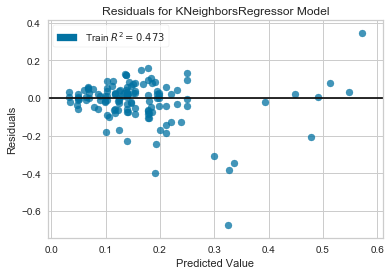

In [81]:
#Plotting residual plot for KNN Regression method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = neighbors.KNeighborsRegressor()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)  
g = visualizer.poof()

In [82]:
#Random Forest Method
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop =200, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 

In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.1s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [84]:
#Storing the best parameter
params_rf=rf_random.best_params_

In [85]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)               #using 5Fold model to find the best train and test set
RMSE_array2=[]
RMSE_array7=[]
R_sq_array2=[] 
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor = RandomForestRegressor(**params_rf) 
        regressor.fit(X_train, y_train)  
        yhat=regressor.predict(X_test)  
        y_pred_train = regressor.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array2.append(RMSE_test)
        RMSE_array7.append(RMSE_train)
        R_sq = regressor.score(X_train, y_train)
        R_sq_array2.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array2)," , ",min(RMSE_array2),"]")
print("RMSE_train_Range = [",max(RMSE_array7)," , ",min(RMSE_array7),"]")
print(np.mean(R_sq_array2))


RMSE_test:  0.235028919357788 RMSE_train:  0.043394400567559714
R^2:  0.8391914551333657
RMSE_test:  0.1542855703199065 RMSE_train:  0.06073487303229528
R^2:  0.8302437398550687
RMSE_test:  0.10483686530652575 RMSE_train:  0.06678862508382069
R^2:  0.8325274294586799
RMSE_test:  0.045272515256810655 RMSE_train:  0.07390282082676734
R^2:  0.7998311717501897
RMSE_test:  0.13039982971224912 RMSE_train:  0.06690311874836427
R^2:  0.8311884028880054
RMSE_test_Range = [ 0.235028919357788  ,  0.045272515256810655 ]
RMSE_train_Range = [ 0.07390282082676734  ,  0.043394400567559714 ]
0.8265964398170619


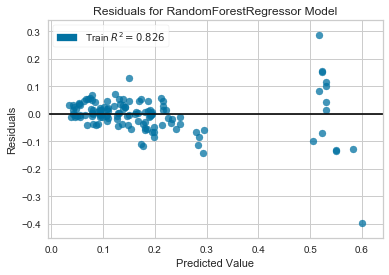

In [86]:
#Plotting residual plot of Random Forest method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = RandomForestRegressor(**params_rf)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [87]:
#Gradient Boosting Method
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01,0.1,1],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1,2,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2036 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.3min finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [88]:
#Storing the best parameter
best_params=grid_search.best_params_

In [89]:
# Fitting Boosting method to the Dataset
#import the libraries
from sklearn import ensemble
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                      # Applying the 5fold cross validation method
RMSE_array3=[]
R_sq_array3=[] 
RMSE_array10=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**best_params)
        Boost=gradient_boosting_regressor.fit(X_train, y_train)       
        yhat=Boost.predict(X_test)  
        y_pred_train = Boost.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array3.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array10.append(RMSE_train)
        R_sq = Boost.score(X_train, y_train)
        R_sq_array3.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array3)," , ",min(RMSE_array3),"]")
print("RMSE_train_Range = [",max(RMSE_array10)," , ",min(RMSE_array10),"]")
print(np.mean(R_sq_array3))


RMSE_test:  0.22063523764401577 RMSE_train:  0.0494210554646295
R^2:  0.791423311830525
RMSE_test:  0.14929266935598084 RMSE_train:  0.06932378289478097
R^2:  0.7788361966093282
RMSE_test:  0.10839170968321125 RMSE_train:  0.08099427289911011
R^2:  0.7537097031715853
RMSE_test:  0.0492656085260359 RMSE_train:  0.08064184363765105
R^2:  0.7616608906429652
RMSE_test:  0.15922445692828605 RMSE_train:  0.07130730628181522
R^2:  0.8082313487713942
RMSE_test_Range = [ 0.22063523764401577  ,  0.0492656085260359 ]
RMSE_train_Range = [ 0.08099427289911011  ,  0.0494210554646295 ]
0.7787722902051596


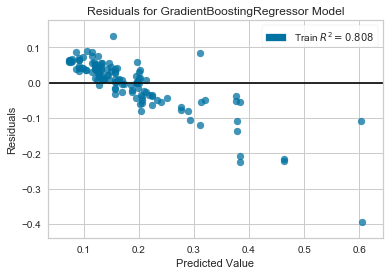

In [90]:
#Plotting residual plot for Gradient Boosting method
from sklearn import ensemble
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ensemble.GradientBoostingRegressor(**best_params)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [91]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'min_samples_leaf': [1,2,3,4,5],
}

dr= DecisionTreeRegressor()
grid_searc = GridSearchCV(estimator = dr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_searc.fit(X_train, y_train)
params_dr=grid_searc.best_params_
print(params_dr)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'min_samples_leaf': 4}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
# Fitting Decision Tree method to the dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)         # Using 5fold cross validation method to find the best train and test data
RMSE_array4=[]
R_sq_array4=[] 
RMSE_array5=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr = DecisionTreeRegressor(**params_dr)
        regr.fit(X_train,y_train)
        yhat=regr.predict(X_test) 
        y_pred_train = regr.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array4.append(RMSE_test)
        RMSE_array5.append(RMSE_train)
        R_sq = regr.score(X_train, y_train)
        R_sq_array4.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array4)," , ",min(RMSE_array4),"]")
print("RMSE_train_Range = [",max(RMSE_array5)," , ",min(RMSE_array5),"]")
print(np.mean(R_sq_array4))



RMSE_test:  0.15683800318423252 RMSE_train:  0.07345087141387488
R^2:  0.5392815121583414
RMSE_test:  0.151623201542906 RMSE_train:  0.06190546670367053
R^2:  0.8236369718071366
RMSE_test:  0.12110614286845738 RMSE_train:  0.06221934597375032
R^2:  0.8546585249692592
RMSE_test:  0.07276786358479263 RMSE_train:  0.06892455785443062
R^2:  0.8258905299597035
RMSE_test:  0.25161963325659087 RMSE_train:  0.06409856356827857
R^2:  0.8450448029662089
RMSE_test_Range = [ 0.25161963325659087  ,  0.07276786358479263 ]
RMSE_train_Range = [ 0.07345087141387488  ,  0.06190546670367053 ]
0.7777024683721299


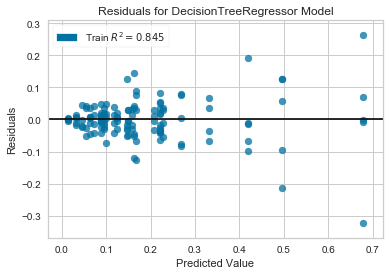

In [93]:
#Plotting residual plot for Decision Tree Method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = DecisionTreeRegressor(**params_dr)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

# Imputing Missing Dataset with Most Frequent 

In [94]:
# Substituting 10% of data with NaN
p=df_1_.values
l=p.tolist()
for j in range(0,3):
    samp=random.sample(range(0,161),16)
    for i in range(16):
        l[samp[i]][j]=np.nan       
X_NEW=pd.DataFrame(l)
X_NEW.columns=['X1','X2','X3','Y1']
X_NEW

,X1,X2,X3,Y1
0,0.204545,NaN,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,NaN,0.367621
3,0.431818,0.498747,NaN,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,NaN,0.120461,0.680888
6,0.659091,0.498747,NaN,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [95]:
#Imputing Data With Most Frequent
from sklearn.impute import SimpleImputer
mode_imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
mode_imputer = mode_imputer.fit(X_NEW)
imputed_df = mode_imputer.transform(X_NEW)
dataset = pd.DataFrame({'X1': imputed_df[:, 0], 'X2': imputed_df[:, 1],'X3':imputed_df[:,2]})


C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [96]:
#Joining column Y1 to dataset
dataset['Y']= X_NEW['Y1']
dataset

,X1,X2,X3,Y
0,0.204545,0.047619,0.120461,0.398013
1,0.204545,0.749373,0.180703,0.368790
2,0.204545,1.000000,0.000048,0.367621
3,0.431818,0.498747,0.000048,0.415546
4,0.431818,0.749373,0.240946,0.486850
5,0.431818,0.047619,0.120461,0.680888
6,0.659091,0.498747,0.000048,0.429573
7,0.659091,0.749373,0.120461,0.685564
8,0.659091,1.000000,0.180703,0.516072
9,0.318182,0.077694,0.000096,0.118258


In [97]:
# Storing different X columns in X and Y column in Y1
X_new=dataset
X=pd.DataFrame(X_new,columns=['X1','X2','X3'])
Y1=pd.DataFrame(X_new,columns=['Y'])

In [98]:
# Fitting the dataset with least square method
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y1,X).fit()
model.summary()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     8.670
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           2.32e-05
Time:                        23:41:44   Log-Likelihood:                 87.777
No. Observations:                 162   AIC:                            -167.6
Df Residuals:                     158   BIC:                            -155.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.020      4.314      0.000       0.046       0.123
X1             0.2157      0.060      3.604      0.000       0.097       0.334
X2             0.0883      0.043      2.038      0.043       0.003       0.174
X3             0.1723      0.068      2.525      0.013       0.038       0.307
==============================================================================
Omnibus:                       71.190   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.523
Skew:                           1.719   Prob(JB):                     1.78e-54
Kurtosis:                       7.985   Cond. No.                         6.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Adding new features to existing dataset
X_new['X1^2'] = X_new.X1*X_new.X1
X_new['X1^3'] = X_new.X1*X_new.X1*X_new.X1
X_new['X1^4'] = X_new.X1*X_new.X1*X_new.X1*X_new.X1
X_new['expX1'] = np.exp(X_new.X1)
X_new['X2^2'] = X_new.X2*X_new.X2
X_new['X2^3'] = X_new.X2*X_new.X2*X_new.X2
X_new['X2^4'] = X_new.X2*X_new.X2*X_new.X2*X_new.X2
X_new['expX2'] = np.exp(X_new.X2)
X_new['X3^2'] = X_new.X3*X_new.X3
X_new['X3^3'] = X_new.X3*X_new.X3*X_new.X3
X_new['X3^4'] = X_new.X3*X_new.X3*X_new.X3*X_new.X3
X_new['expX3'] = np.exp(X_new.X3)
X_new['X1X2'] = X_new.X1*X_new.X2
X_new['X2X3'] = X_new.X2*X_new.X3
X_new['X1X3'] = X_new.X1*X_new.X3
X_new['X1X2X3'] = X_new.X1*X_new.X2*X_new.X3

In [100]:
# Splitting the dataset into train and test set
train_data = X_new.sample(frac=0.70)
test_data = X_new.drop(train_data.index)
    
X = train_data.drop('Y',1)
Y = train_data['Y']

In [101]:
# Fitting least square method to the new generated features
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     9.267
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           2.98e-14
Time:                        23:41:44   Log-Likelihood:                 102.15
No. Observations:                 113   AIC:                            -164.3
Df Residuals:                      93   BIC:                            -109.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.805e+04   3822.632     -4.721      0.000   -2.56e+04   -1.05e+04
X1          -558.4308   1776.985     -0.314      0.754   -4087.172    2970.310
X2           480.5735    864.249      0.556      0.580   -1235.654    2196.801
X3         -1.796e+04   3288.254     -5.463      0.000   -2.45e+04   -1.14e+04
X1^2        -279.9523    897.190     -0.312      0.756   -2061.595    1501.690
X1^3         -92.1331    267.048     -0.345      0.731    -622.437     438.171
X1^4         -29.6598    113.710     -0.261      0.795    -255.466     196.146
expX1        558.8072   1777.775      0.314      0.754   -2971.501    4089.115
X2^2         250.0928    439.330      0.569      0.571    -622.330    1122.516
X2^3          63.1808    124.126      0.509      0.612    -183.310     309.671
X2^4          35.3005     58.719      0.601      0.549     -81.304     151.905
expX2       -482.7734    865.004     -0.558      0.578   -2200.499    1234.952
X3^2       -9047.8714   1657.240     -5.460      0.000   -1.23e+04   -5756.921
X3^3       -2738.5982    499.450     -5.483      0.000   -3730.406   -1746.790
X3^4       -1125.7381    207.254     -5.432      0.000   -1537.304    -714.172
expX3       1.797e+04   3289.323      5.463      0.000    1.14e+04    2.45e+04
X1X2           2.4987      0.535      4.666      0.000       1.435       3.562
X2X3           1.7481      0.657      2.659      0.009       0.443       3.054
X1X3           4.5992      1.937      2.374      0.020       0.752       8.446
X1X2X3       -11.8536      3.508     -3.379      0.001     -18.820      -4.887
==============================================================================
Omnibus:                       34.961   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.387
Skew:                           1.009   Prob(JB):                     4.38e-27
Kurtosis:                       7.660   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# Importing the libraries
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
# running for loop for 100 times
a=100
while a:
    a=a-1
    #dividing data into training(70%) and test data(30%)
    train_data = X_new.sample(frac=0.7)
    test_data = X_new.drop(train_data.index)
    
    X = train_data.drop('Y',1)
    Y = train_data['Y']
    cols = list(X.columns)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(Y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    selected_features_BE = cols
    y = train_data['Y']
    x = train_data[selected_features_BE]
    x = sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    if(len(selected_features_BE)>4):             # Conditions to be satisfied for the feature to get selected
        print(a,"\t",results.fvalue)
    if(len(selected_features_BE)>4 and results.rsquared_adj >0.5 and results.rsquared > 0.75 and results.fvalue >= 18):
        break

print(results.summary())

# Fitting the selected features with least square method
x=train_data[selected_features_BE]
y=train_data[['Y']]

reg = LinearRegression().fit(x, y)
print("R^2: ",reg.score(x, y))
print("Coefficients: ",reg.coef_)
print("Intercept: ",reg.intercept_)
############################################################################
#calculating RMSE for both training and testing data
print("**************RMSE of training data:**************")
yhat=reg.predict(x)
print(np.sqrt(mean_squared_error(train_data.Y, yhat)))

print('**************RMSE of testing data:"**************')
yhat = reg.predict(test_data[selected_features_BE])
print(np.sqrt(mean_squared_error(test_data.Y, yhat)))

99 	 10.201932383985003
98 	 10.984207525331914
97 	 12.563610314448878
96 	 10.114878372344402
95 	 16.967630088250612
94 	 13.201748148649829
93 	 10.416273885799656
92 	 11.080415034273187
91 	 10.517798620170225
90 	 9.589514757431848
89 	 11.463858675489346
88 	 11.229228106942843
87 	 10.966916498302123
86 	 13.823004067280355
85 	 7.857928034705238
84 	 12.330231818836006
83 	 10.834369600652847
82 	 11.608432753549623
81 	 13.935122159741955
80 	 12.232441381836738
79 	 10.190308397878738
78 	 11.83098215166949
77 	 11.338241421361955
76 	 9.997754930437468
75 	 9.170781525014462
74 	 10.905417581996286
73 	 16.63676662166818
72 	 12.822592551046064
71 	 17.00172605526595
70 	 8.576602125267852
69 	 13.043531011271012
68 	 10.52093131484167
67 	 8.383330468701935
66 	 17.061199987924798
65 	 12.11380666470049
64 	 14.510986480974314
63 	 8.9577146543344
62 	 10.44881100850588
61 	 12.812039580300409
60 	 10.311530987179891
59 	 13.4752967776406
58 	 15.255397841575057
57 	 14.2

In [103]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X=X_new.drop('Y',1)
Y=X_new['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

[49.7 79.  96.1 97.6 99.  99.6 99.8 99.9 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9 99.9 99.9 99.9]


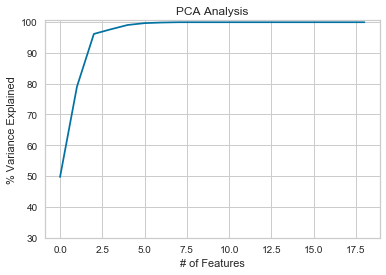

In [104]:
# Applying PCA for calculating Varience ratio of each feature
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
X=X_new.drop('Y',1)
Y=X_new['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
covar_matrix = PCA(n_components = 19)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var) #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [105]:
# Generating a new dataset for selected features
df_2 = X_new[selected_features_BE]
Y2 = pd.DataFrame(X_new,columns=['Y'])
df_2 = df_2.join(Y2)
df_2

,X1,X2,X3,X1^4,expX1,X2^2,X2^3,X2^4,expX2,X3^2,X3^3,X3^4,expX3,X1X2,X1X3,Y
0,0.204545,0.047619,0.120461,1.750489e-03,1.226967,0.002268,0.000108,5.141890e-06,1.048771,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.009740,0.024640,0.398013
1,0.204545,0.749373,0.180703,1.750489e-03,1.226967,0.561561,0.420819,3.153502e-01,2.115674,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.153281,0.036962,0.368790
2,0.204545,1.000000,0.000048,1.750489e-03,1.226967,1.000000,1.000000,1.000000e+00,2.718282,2.322655e-09,1.119379e-13,5.394727e-18,1.000048,0.204545,0.000010,0.367621
3,0.431818,0.498747,0.000048,3.476992e-02,1.540055,0.248748,0.124063,6.187579e-02,1.646656,2.322655e-09,1.119379e-13,5.394727e-18,1.000048,0.215368,0.000021,0.415546
4,0.431818,0.749373,0.240946,3.476992e-02,1.540055,0.561561,0.420819,3.153502e-01,2.115674,5.805477e-02,1.398804e-02,3.370356e-03,1.272452,0.323593,0.104045,0.486850
5,0.431818,0.047619,0.120461,3.476992e-02,1.540055,0.002268,0.000108,5.141890e-06,1.048771,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.020563,0.052017,0.680888
6,0.659091,0.498747,0.000048,1.887041e-01,1.933034,0.248748,0.124063,6.187579e-02,1.646656,2.322655e-09,1.119379e-13,5.394727e-18,1.000048,0.328720,0.000032,0.429573
7,0.659091,0.749373,0.120461,1.887041e-01,1.933034,0.561561,0.420819,3.153502e-01,2.115674,1.451079e-02,1.747980e-03,2.105630e-04,1.128016,0.493905,0.079395,0.685564
8,0.659091,1.000000,0.180703,1.887041e-01,1.933034,1.000000,1.000000,1.000000e+00,2.718282,3.265363e-02,5.900613e-03,1.066259e-03,1.198059,0.659091,0.119100,0.516072
9,0.318182,0.077694,0.000096,1.024947e-02,1.374626,0.006036,0.000469,3.643806e-05,1.080792,9.290620e-09,8.955031e-13,8.631563e-17,1.000096,0.024721,0.000031,0.118258


In [106]:
# Calculating R^2 and Varience Inflation factor of each feature
x = df_2.drop('Y',1)
y = df_2['Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
names = list(x)
print(names)
inp_df = pd.DataFrame(x, columns=names)
for i in range(0,len(names)):
    Y = x.loc[:,inp_df.columns == names[i]]
    X = x.loc[:,inp_df.columns != names[i]]
    model = sm.OLS(Y,X)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/(1-rsq) ,2)
    print('values of R^2',rsq)
    print('values of VIF',vif)

['X1', 'X2', 'X3', 'X1^4', 'expX1', 'X2^2', 'X2^3', 'X2^4', 'expX2', 'X3^2', 'X3^3', 'X3^4', 'expX3', 'X1X2', 'X1X3']
values of R^2 0.9994502839249927
values of VIF 1819.12
values of R^2 0.9999999988340809
values of VIF 857692413.26
values of R^2 0.9999999963626117
values of VIF 274922533.19
values of R^2 0.9896198580967189
values of VIF 96.34
values of R^2 0.9999602915909004
values of VIF 25183.58
values of R^2 0.999999991339339
values of VIF 115464628.38
values of R^2 0.999999829863579
values of VIF 5877636.28
values of R^2 0.9999989367408277
values of VIF 940504.47
values of R^2 0.9999999999198657
values of VIF 12479044002.99
values of R^2 0.9999999731221431
values of VIF 37205347.22
values of R^2 0.9999996718946389
values of VIF 3047801.46
values of R^2 0.9999979021241191
values of VIF 476672.62
values of R^2 0.999999999885768
values of VIF 8754117711.7
values of R^2 0.8905025966836595
values of VIF 9.13
values of R^2 0.9134991247918303
values of VIF 11.56


Beta value for each lambda:
[array([-4.62037828e+02,  2.80202934e+02, -1.50928530e+04, -2.32736382e+02,
       -7.47761407e+01, -2.53212402e+01,  4.62586365e+02,  1.49977316e+02,
        3.17659706e+01,  2.30080546e+01, -2.82449770e+02, -7.60241462e+03,
       -2.29889062e+03, -9.47028400e+02,  1.50969728e+04,  2.32955956e+00,
        1.38440784e+00,  3.88184960e+00, -1.02218920e+01]), array([  0.70951723,  -1.81088424,  -0.8355988 ,  -1.4132752 ,
        -1.11649267,   1.86661989,  -0.032127  ,   5.90271731,
        -8.78588359,   4.12955472,   0.12592084,   2.36709476,
        -4.99653337,   2.59220591,   0.15705079,   2.05809052,
         1.69338127,   5.56753014, -10.90570831]), array([  0.72885944,  -1.70496627,  -0.63740116,  -1.4716399 ,
        -0.98110006,   1.78553433,  -0.04059186,   5.42218074,
        -7.97675478,   3.70688019,   0.11739934,   1.8685958 ,
        -3.78050993,   1.88876121,   0.04789765,   2.02689353,
         1.65182842,   5.29075901, -10.36824328]), array

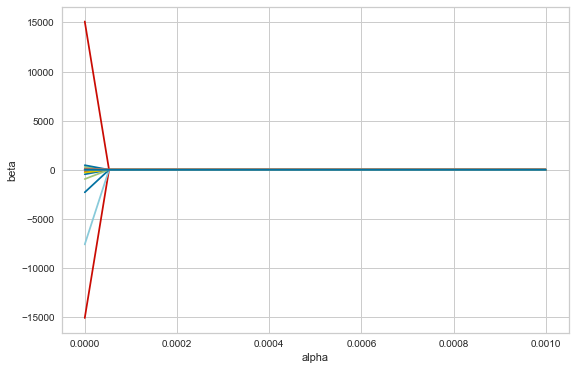

In [136]:
#performing 10 fold cross validation on ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)        # Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]

        ridge_model=Ridge()
        ridge_model.set_params(alpha=a)
        ridge_model.fit(x, y)
        coefs.append(ridge_model.coef_)
        
        kf = KFold(n_splits=10)                 # Splitting the data into 10 fold
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ridge_model.set_params(alpha=a)
            ridge_model.fit(X_train, y_train)
            yhat = ridge_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(ridge_model.score(X_train, y_train))    
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:\n")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)

#Plot between alpha and beta
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [108]:
# Calculating smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.14747337760859322
Maximum R^2 value is: 0.5632182348046623


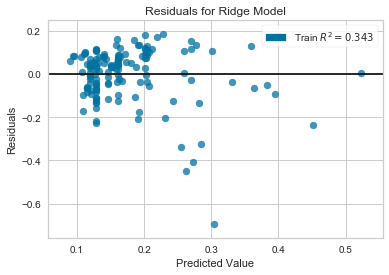

In [109]:
#Plotting residual plot of ridge method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0097386001941802, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages

Beta value for each lambda:
[array([  0.66486397,  -0.7269661 ,  -0.46312629,  -2.19687762,
         0.36388803,   0.98692411,   0.07720559,   1.29268084,
        -1.32514105,   0.40360284,  -0.02548682,   0.50975528,
        -0.84370243,   0.20796581,  -0.06176324,   2.17138264,
         1.93649228,   5.8405577 , -11.51036102]), array([ 0.59553732, -0.3786435 ,  0.        , -1.4459759 , -0.        ,
        0.86339823,  0.        ,  0.35982527, -0.        , -0.26474985,
       -0.        ,  0.        , -0.        , -0.29244797,  0.11524593,
        1.27874149,  0.52583549,  0.71776051, -0.63373085]), array([ 4.01713103e-01, -1.85303220e-01,  0.00000000e+00, -9.83857037e-01,
       -0.00000000e+00,  5.77507266e-01,  0.00000000e+00,  4.48337360e-04,
       -0.00000000e+00, -5.56272614e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.71996137e-01,  1.10188956e-01,  1.15984577e+00,
        4.75680114e-01,  4.95866481e-01, -0.00000000e+00]), array([ 0.20433152, -0.17421998

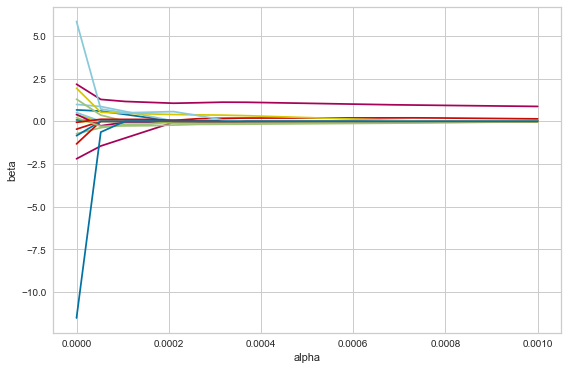

In [137]:
#performing 10 fold cross validation on LASSO regression
from sklearn import linear_model
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001,20 )        # Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        
        lasso_model = linear_model.Lasso(alpha=a)
        lasso_model.fit(x, y)
        coefs.append(lasso_model.coef_)
        
        kf = KFold(n_splits=10)                   # Splitting dataset into 10 folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            lasso_model.set_params(alpha=a)
            lasso_model.fit(X_train, y_train)
            yhat = lasso_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(lasso_model.score(X_train, y_train))    
        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)
print("-------------------------------")

#Plot between alpha and beta
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')



plt.show()

In [111]:
# Calculating smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.1334586896436055
Maximum R^2 value is: 0.359897560570412


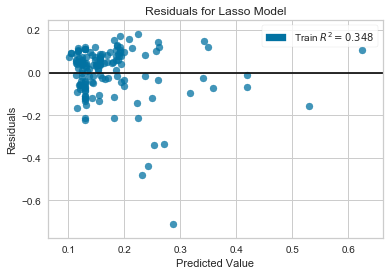

In [112]:
#Plotting residual plot of Lasso method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = linear_model.Lasso(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0097386001941802, tolerance: 0.0003737640809628503
  positive)
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\line

Beta value for each lambda:
[array([  0.66486397,  -0.7269661 ,  -0.46312629,  -2.19687762,
         0.36388803,   0.98692411,   0.07720559,   1.29268084,
        -1.32514105,   0.40360284,  -0.02548682,   0.50975528,
        -0.84370243,   0.20796581,  -0.06176324,   2.17138264,
         1.93649228,   5.8405577 , -11.51036102]), array([ 0.57899116, -0.40308738,  0.        , -1.41221091, -0.        ,
        0.84548026,  0.        ,  0.57359555, -0.13645386, -0.2520696 ,
       -0.04225885,  0.14462898, -0.        , -0.35967846,  0.06199418,
        1.29442785,  0.54833055,  0.87829966, -0.93307241]), array([ 0.43332026, -0.32111571,  0.        , -1.04647228, -0.        ,
        0.61929275,  0.        ,  0.28233653, -0.        , -0.22048167,
       -0.        ,  0.        , -0.        , -0.29627883,  0.13104927,
        1.15342991,  0.42038645,  0.55680782, -0.        ]), array([ 0.3232448 , -0.23771204,  0.00292367, -0.78327662, -0.        ,
        0.45470772,  0.        ,  0.123411

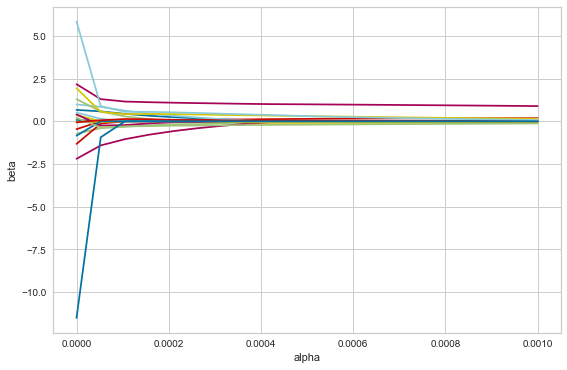

In [138]:
#performing 10 fold cross validation on elastic net
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
x = (X_new.drop("Y",1)).values
y = (X_new["Y"]).values

alphas = np.linspace(0, 0.001, 20)               # Doing iteration 20 times from 0 to 0.001
RMSE_avg_array=[]
coefs = []
R_avg_array=[]
for a in alphas:
        RMSE_array=[]
        R_sq_array=[]
        
        ElasticNet_model = ElasticNet(alpha=a)
        ElasticNet_model.fit(x, y)
        coefs.append(ElasticNet_model.coef_)
        
        kf = KFold(n_splits=10)                 # Splitting dataset into 10 folds
        for train_index, test_index in kf.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            ElasticNet_model.set_params(alpha=a)
            ElasticNet_model.fit(X_train, y_train)
            yhat = ElasticNet_model.predict(X_test)
            RMSE=np.sqrt(mean_squared_error(y_test, yhat))
            RMSE_array.append(RMSE)
            R_sq_array.append(ElasticNet_model.score(X_train, y_train))    

        RMSE_avg_array.append(np.average(RMSE_array))
        R_avg_array.append(np.average(R_sq_array))
print("Beta value for each lambda:")
print(coefs)
print("Mean RMSE value for each lambda:")
print(RMSE_avg_array)
print("R_sq value for each lambda:\n")
print(R_avg_array)

print("-------------------------------------")

#Plot between alpha and beta
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.axis('tight')


plt.show()

In [114]:
# Calculating smallest RMSE and Maximum R^2 value
print("Smallest RMSE is:", min(RMSE_avg_array))
print("Maximum R^2 value is:", max(R_sq_array))

Smallest RMSE is: 0.13732931115326721
Maximum R^2 value is: 0.3812653163748194


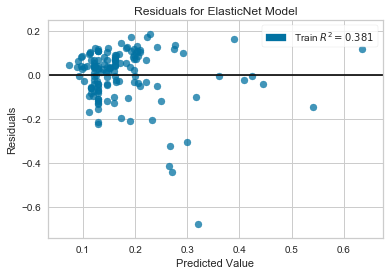

In [115]:
#Plotting residual plot of Elastic Net method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ElasticNet(alpha=a)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [116]:
#Storing the new train and test dataset
X = df_2.drop('Y',1)
Y = df_2['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

RMSE value for k=  1 is: 0.1453744943029668
RMSE value for k=  2 is: 0.148638078959077
RMSE value for k=  3 is: 0.16124703458688763
RMSE value for k=  4 is: 0.15349704980543277
RMSE value for k=  5 is: 0.15812264597853798
RMSE value for k=  6 is: 0.16363639725250934
RMSE value for k=  7 is: 0.16651420637582148
RMSE value for k=  8 is: 0.16741680841356357
RMSE value for k=  9 is: 0.17130892956216356
RMSE value for k=  10 is: 0.17245274181075315
RMSE value for k=  11 is: 0.16969651690378484
RMSE value for k=  12 is: 0.16763637142233856
RMSE value for k=  13 is: 0.1708681675399887
RMSE value for k=  14 is: 0.1667236784751733
RMSE value for k=  15 is: 0.16710071091715722
RMSE value for k=  16 is: 0.16952846511615946
RMSE value for k=  17 is: 0.1699389679632383
RMSE value for k=  18 is: 0.17098231410842912
RMSE value for k=  19 is: 0.1711794826791587
RMSE value for k=  20 is: 0.1696162824538634
RMSE value for k=  21 is: 0.1693990333786772
RMSE value for k=  22 is: 0.17089935639637122
RMSE v

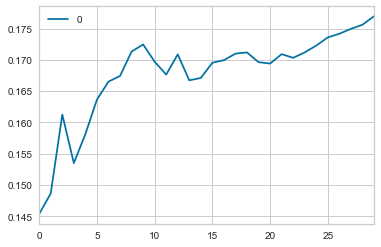

In [117]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
V = rmse_val.index(np.min(rmse_val))
best_k = V+1
print('Best Value of K is:',best_k)
    
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [118]:
#KNN Regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                          # Using the 5fold model to find the best train and test set
RMSE_array8=[] 
RMSE_array9=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
        model.fit(X_train, y_train)  
        yhat=model.predict(X_test)  
        y_pred_train = model.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array8.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array9.append(RMSE_train)
        R_sq = model.score(X_train, y_train)
        R_sq_array.append(R_sq)
        print("RMSE_test: ",RMSE_test," RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array8)," , ",min(RMSE_array8),"]")
print("RMSE_train_Range = [",max(RMSE_array9)," , ",min(RMSE_array9),"]")
print(np.mean(R_sq_array))

RMSE_test:  0.32420123365287873  RMSE_train:  0.01247929586314376
R^2:  0.9867009108475938
RMSE_test:  0.21105590604258928  RMSE_train:  0.01782831962697928
R^2:  0.9853724912670898
RMSE_test:  0.1830810990472901  RMSE_train:  0.016970378014460025
R^2:  0.9891876097375932
RMSE_test:  0.06584388941475716  RMSE_train:  0.01014488136773299
R^2:  0.9962280288562791
RMSE_test:  0.39462203324460615  RMSE_train:  0.01803568149316985
R^2:  0.9877319746003512
RMSE_test_Range = [ 0.39462203324460615  ,  0.06584388941475716 ]
RMSE_train_Range = [ 0.01803568149316985  ,  0.01014488136773299 ]
0.5580539924170577


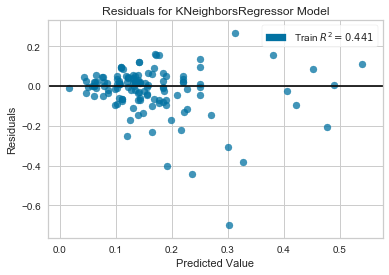

In [119]:
#Plotting residual plot for KNN Regression method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = neighbors.KNeighborsRegressor()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [120]:
#Random Forest Method
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop =200, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 

In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.0s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [122]:
#Storing the best parameter
params_rf=rf_random.best_params_

In [123]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)               #using 5Fold model to find the best train and test set
RMSE_array2=[]
RMSE_array7=[]
R_sq_array2=[] 
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regressor = RandomForestRegressor(**params_rf)
        regressor.fit(X_train, y_train)  
        yhat=regressor.predict(X_test)  
        y_pred_train = regressor.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array2.append(RMSE_test)
        RMSE_array7.append(RMSE_train)
        R_sq = regressor.score(X_train, y_train)
        R_sq_array2.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array2)," , ",min(RMSE_array2),"]")
print("RMSE_train_Range = [",max(RMSE_array7)," , ",min(RMSE_array7),"]")
print(np.mean(R_sq_array2))


RMSE_test:  0.2388139638930974 RMSE_train:  0.07439965971650203
R^2:  0.5273021430756207
RMSE_test:  0.1409585628626616 RMSE_train:  0.07789280258695859
R^2:  0.7207814913626679
RMSE_test:  0.11268432819635078 RMSE_train:  0.08300500254646531
R^2:  0.7413293141668444
RMSE_test:  0.05947194232667597 RMSE_train:  0.0869814747165559
R^2:  0.7227139960070651
RMSE_test:  0.20697037856662512 RMSE_train:  0.07137343608926516
R^2:  0.807875494510198
RMSE_test_Range = [ 0.2388139638930974  ,  0.05947194232667597 ]
RMSE_train_Range = [ 0.0869814747165559  ,  0.07137343608926516 ]
0.7040004878244792


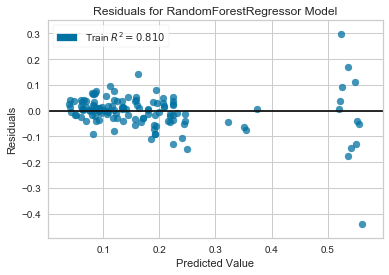

In [124]:
#Plotting residual plot for Random Forest method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = RandomForestRegressor(**params_rf)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [125]:
#Gradient Boosting Method
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01,0.1,1],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1,2,3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 691 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1501 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.7min finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [126]:
#Storing the best parameter
best_params=grid_search.best_params_

In [127]:
# Fitting Boosting method to the Dataset
#import the libraries
from sklearn import ensemble
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)                      # Applying the 5fold cross validation method
RMSE_array3=[]
R_sq_array3=[] 
RMSE_array10=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**best_params)
        Boost=gradient_boosting_regressor.fit(X_train, y_train)       
        yhat=Boost.predict(X_test)  
        y_pred_train = Boost.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_array3.append(RMSE_test)
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array10.append(RMSE_train)
        R_sq = Boost.score(X_train, y_train)
        R_sq_array3.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array3)," , ",min(RMSE_array3),"]")
print("RMSE_train_Range = [",max(RMSE_array10)," , ",min(RMSE_array10),"]")
print(np.mean(R_sq_array3))


RMSE_test:  0.24466710875443426 RMSE_train:  0.07560731672584615
R^2:  0.5118319120692627
RMSE_test:  0.1556958560031624 RMSE_train:  0.0843275927198902
R^2:  0.6727429971750574
RMSE_test:  0.09959799889117386 RMSE_train:  0.09154983948615343
R^2:  0.6853310764296932
RMSE_test:  0.05146282572299485 RMSE_train:  0.09446054609257606
R^2:  0.6729792427064198
RMSE_test:  0.16825141772051871 RMSE_train:  0.08172158595112239
R^2:  0.7481261243813901
RMSE_test_Range = [ 0.24466710875443426  ,  0.05146282572299485 ]
RMSE_train_Range = [ 0.09446054609257606  ,  0.07560731672584615 ]
0.6582022705523646


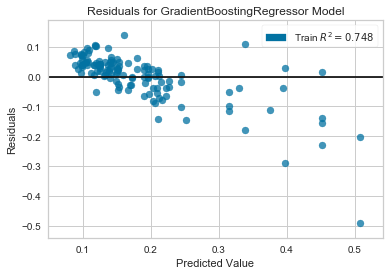

In [128]:
#Plotting residual plot for Gradient Boosting method
from sklearn import ensemble
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = ensemble.GradientBoostingRegressor(**best_params)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()

In [129]:
#Decision Tree Regressor Method
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'min_samples_leaf': [1,2,3,4,5],
}

dr= DecisionTreeRegressor()
grid_searc = GridSearchCV(estimator = dr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_searc.fit(X_train, y_train)
params_dr=grid_searc.best_params_
print(params_dr)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'min_samples_leaf': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
C:\Users\Sourabh kant dash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
# Fitting Decision Tree method to the dataset
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
x = (df_2.drop("Y",1)).values
y = (df_2["Y"]).values
kf = KFold(n_splits=5)         # Using 5fold cross validation method to find the best train and test data
RMSE_array4=[]
R_sq_array4=[] 
RMSE_array5=[]
for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr = DecisionTreeRegressor(**params_dr)
        regr.fit(X_train,y_train)
        yhat=regr.predict(X_test) 
        y_pred_train = regr.predict(X_train)
        RMSE_test = np.sqrt(mean_squared_error(y_test, yhat))
        RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        RMSE_array4.append(RMSE_test)
        RMSE_array5.append(RMSE_train)
        R_sq = regr.score(X_train, y_train)
        R_sq_array4.append(R_sq)
        print("RMSE_test: ",RMSE_test,"RMSE_train: ",RMSE_train)
        print("R^2: ",R_sq)
print("RMSE_test_Range = [",max(RMSE_array4)," , ",min(RMSE_array4),"]")
print("RMSE_train_Range = [",max(RMSE_array5)," , ",min(RMSE_array5),"]")
print(np.mean(R_sq_array4))



RMSE_test:  0.2920476274348678 RMSE_train:  0.07746998109611902
R^2:  0.4874825756822509
RMSE_test:  0.1491687261227757 RMSE_train:  0.07635456712745306
R^2:  0.731700673958256
RMSE_test:  0.1293275183623878 RMSE_train:  0.07426240193594956
R^2:  0.7929493186968599
RMSE_test:  0.06281868785311896 RMSE_train:  0.08248947806254227
R^2:  0.7506143113013102
RMSE_test:  0.2559973230128555 RMSE_train:  0.07425921738220198
R^2:  0.7920254046578448
RMSE_test_Range = [ 0.2920476274348678  ,  0.06281868785311896 ]
RMSE_train_Range = [ 0.08248947806254227  ,  0.07425921738220198 ]
0.7109544568593044


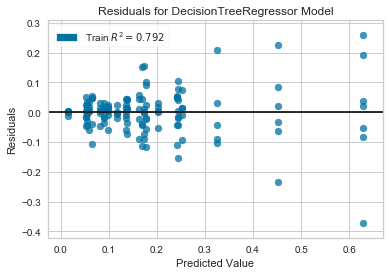

In [131]:
#Plotting residual plot for Decision Tree method
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
model = DecisionTreeRegressor(**params_dr)
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train) 
g = visualizer.poof()